<a href="https://colab.research.google.com/github/Bose-PI/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**


---


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### **Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


---


## **Data Description**

### **Demographic**:

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**:

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**:

• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)

### **Predict variable (desired target)**:

• **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -
DV

## **Importing Libraries And Loading DataSet**

In [1]:
# Importing Basic Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Converting The Raw CSV File Into A DataFrame

df=pd.read_csv('/content/drive/MyDrive/Alma Better/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

## **Data Exploration**

In [4]:
# Head Of The DataFrame

df.head(10)

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   
6   6   61        1.0   M         NO         0.0     0.0                0   
7   7   36        4.0   M        YES        35.0     0.0                0   
8   8   41        2.0   F        YES        20.0     NaN                0   
9   9   55        2.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   
6             1         0    238.0  232.0  136.0  24.83       75.0     79.0   
7             0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8             0         0    220.0  126.0   78.0  20.70       86.0     79.0   
9             1         0    326.0  144.0   81.0  25.71       85.0      NaN   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  
5           1  
6           0  
7           0  
8           0  
9           0

In [5]:
# Tail Of The DataFrame

df.tail(10).T

3380   3381   3382   3383   3384   3385   3386   3387  \
id                3380   3381   3382   3383   3384   3385   3386   3387   
age                 56     63     43     57     61     60     46     44   
education          1.0    1.0    4.0    3.0    1.0    1.0    1.0    3.0   
sex                  F      F      M      F      F      F      F      M   
is_smoking         YES     NO     NO     NO     NO     NO     NO    YES   
cigsPerDay        20.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0   
BPMeds             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
prevalentStroke      0      0      0      0      0      0      0      0   
prevalentHyp         0      0      1      0      1      0      0      1   
diabetes             0      0      0      0      0      0      0      0   
totChol          240.0  205.0  260.0  210.0  217.0  261.0  199.0  352.0   
sysBP            125.0  138.0  129.0  131.0  182.0  123.5  102.0  164.0   
diaBP             79.0   71.0   90.0   85.0   86.0   79.0   56.0  119.0   
BMI              27.38  33.11  25.29  26.59  26.98  29.28  21.96  28.92   
heartRate         80.0   60.0   70.0   70.0  105.0   70.0   80.0   73.0   
glucose           82.0   85.0   62.0   77.0  113.0  103.0   84.0   72.0   
TenYearCHD           0      1      0      0      0      0      0      1   

                  3388   3389  
id                3388   3389  
age                 60     54  
education          1.0    3.0  
sex                  M      F  
is_smoking          NO     NO  
cigsPerDay         0.0    0.0  
BPMeds             NaN    0.0  
prevalentStroke      0      0  
prevalentHyp         1      0  
diabetes             0      0  
totChol          191.0  288.0  
sysBP            167.0  124.0  
diaBP            105.0   77.0  
BMI              23.01  29.88  
heartRate         80.0   79.0  
glucose           85.0   92.0  
TenYearCHD           0      0

In [6]:
# Shape Of The DataFrame

df.shape

(3390, 17)

In [7]:
# Renaming The Columns

df.rename(columns={'is_smoking':'smoking', 'cigsPerDay':'cigs_per_day','BPMeds':'BP_meds','prevalentStroke':'prev_stroke','prevalentHyp':'prev_hyp',
                   'totChol':'total_chol', 'sysBP':'sys_BP', 'diaBP':'dia_BP', 'heartRate':'heart_beat', 'TenYearCHD':'10yr_CHD'}, inplace=True)

In [8]:
# Basic Information Of The DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3390 non-null   int64  
 1   age           3390 non-null   int64  
 2   education     3303 non-null   float64
 3   sex           3390 non-null   object 
 4   smoking       3390 non-null   object 
 5   cigs_per_day  3368 non-null   float64
 6   BP_meds       3346 non-null   float64
 7   prev_stroke   3390 non-null   int64  
 8   prev_hyp      3390 non-null   int64  
 9   diabetes      3390 non-null   int64  
 10  total_chol    3352 non-null   float64
 11  sys_BP        3390 non-null   float64
 12  dia_BP        3390 non-null   float64
 13  BMI           3376 non-null   float64
 14  heart_beat    3389 non-null   float64
 15  glucose       3086 non-null   float64
 16  10yr_CHD      3390 non-null   int64  
dtypes: float64(9), int64(6), object(2)
memory usage: 450.4+ KB


Out of 17 columns, There are 2 categorical and 15 numerical columns.

In [9]:
# Statistical Summary Of The DataFrame

df.describe()

id          age    education  cigs_per_day      BP_meds  \
count  3390.000000  3390.000000  3303.000000   3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936      9.069477     0.029886   
std     978.753033     8.592878     1.019081     11.879078     0.170299   
min       0.000000    32.000000     1.000000      0.000000     0.000000   
25%     847.250000    42.000000     1.000000      0.000000     0.000000   
50%    1694.500000    49.000000     2.000000      0.000000     0.000000   
75%    2541.750000    56.000000     3.000000     20.000000     0.000000   
max    3389.000000    70.000000     4.000000     70.000000     1.000000   

       prev_stroke     prev_hyp     diabetes   total_chol      sys_BP  \
count  3390.000000  3390.000000  3390.000000  3352.000000  3390.00000   
mean      0.006490     0.315339     0.025664   237.074284   132.60118   
std       0.080309     0.464719     0.158153    45.247430    22.29203   
min       0.000000     0.000000     0.000000   107.000000    83.50000   
25%       0.000000     0.000000     0.000000   206.000000   117.00000   
50%       0.000000     0.000000     0.000000   234.000000   128.50000   
75%       0.000000     1.000000     0.000000   264.000000   144.00000   
max       1.000000     1.000000     1.000000   696.000000   295.00000   

            dia_BP          BMI   heart_beat      glucose     10yr_CHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [10]:
# Checking Duplicated Entries

df.duplicated().value_counts()

False    3390
dtype: int64

The given dataset contains no duplicated entries.

In [11]:
# Dropping The ID Column

df.drop(['id'], axis=1, inplace=True)

In [12]:
# Checking The Null Values

df.isna().sum().sort_values(ascending=False)

glucose         304
education        87
BP_meds          44
total_chol       38
cigs_per_day     22
BMI              14
heart_beat        1
age               0
sex               0
smoking           0
prev_stroke       0
prev_hyp          0
diabetes          0
sys_BP            0
dia_BP            0
10yr_CHD          0
dtype: int64

Glucose column has the most number of null values.

## **Treating Null Values**

**Simple Imputer For Columns With Less Null Values**

In [13]:
# Imputing Null Values For Education, BP_meds Column

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df["education"] = imp.fit_transform(df[["education"]]).ravel()
df["BP_meds"] = imp.fit_transform(df[["BP_meds"]]).ravel()


In [14]:
# Imputing Null Values For Total_chol, Cigs_Per_Day, BMI, Heart_Beat, Diabetes Columns

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
df["total_chol"] = imp.fit_transform(df[["total_chol"]]).ravel()
df["cigs_per_day"] = imp.fit_transform(df[["cigs_per_day"]]).ravel()
df["BMI"] = imp.fit_transform(df[["BMI"]]).ravel()
df["heart_beat"] = imp.fit_transform(df[["heart_beat"]]).ravel()
df["diabetes"] = imp.fit_transform(df[["diabetes"]]).ravel()

**KNN Imputer For Columns With Most Number Of Null Values**

In [15]:
# Imputing Null Values For Glucose Column

from sklearn.impute import KNNImputer
imp2= KNNImputer(n_neighbors=5)
df["glucose"] = imp2.fit_transform(df[["glucose"]]).ravel()


In [16]:
# Checking Null Values

df.isna().sum()

age             0
education       0
sex             0
smoking         0
cigs_per_day    0
BP_meds         0
prev_stroke     0
prev_hyp        0
diabetes        0
total_chol      0
sys_BP          0
dia_BP          0
BMI             0
heart_beat      0
glucose         0
10yr_CHD        0
dtype: int64

Here 10yr_chd is the target variable.

age,cigs_per_day,total_chol,sys_BP,dia_BP,BMI,heart_beat,glucose are continuous numerical variables.

education,smoking_?,BP_meds,prevalent_stroke,prevalent_hyp,diabetes are categorical variables

## **Data Visualization**

In [17]:
# Creating Two Separate Data Frames for Categorical And Numerical Columns

num_col=df.drop(['education','sex','smoking','BP_meds','prev_stroke','prev_hyp','diabetes','10yr_CHD'],axis=1)
cat_col=df.drop(['age','cigs_per_day','total_chol','sys_BP','dia_BP','BMI','heart_beat','glucose'],axis=1)



---


**Univariate Analysis For Categorical Columns**


---



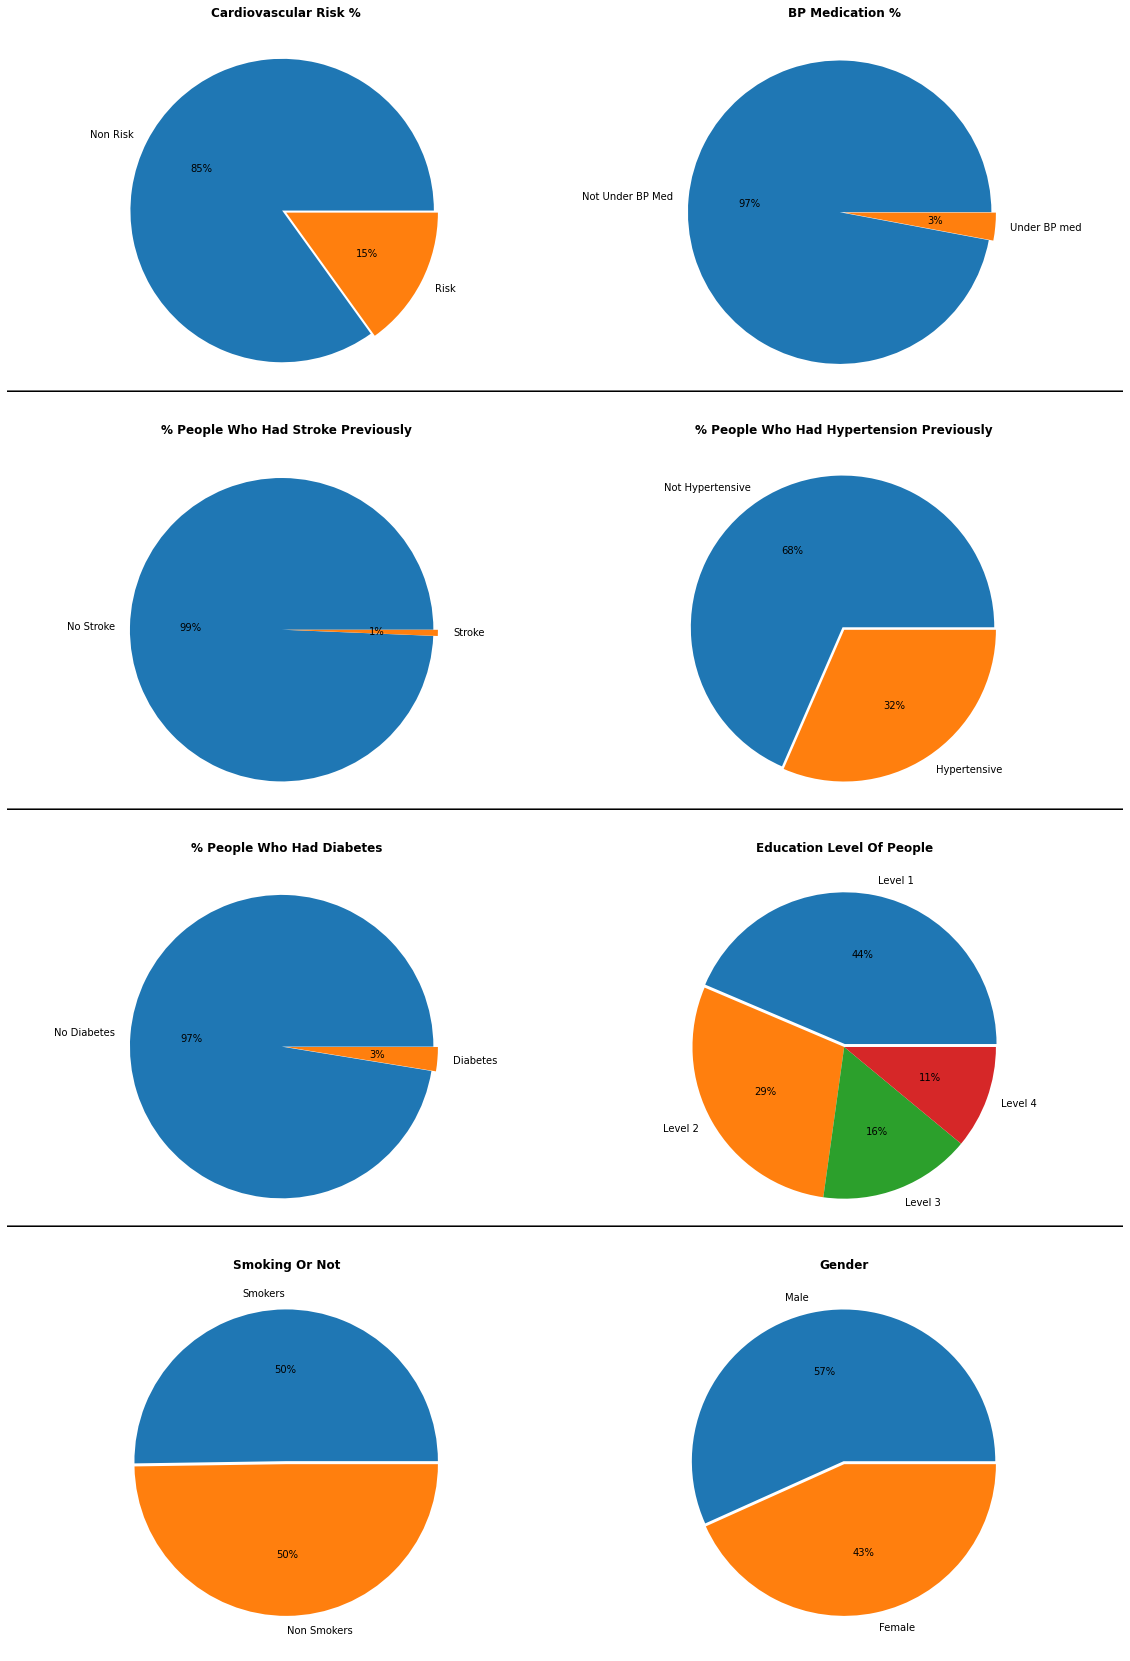

In [18]:
# Plotting The Composition Of Sub-Categories Within Each Categorical Column

fig, ax = plt.subplots(figsize = (20, 30))

plt.subplot(4,2,1)
labels = 'Non Risk',"Risk"
plt.pie(df['10yr_CHD'].value_counts(), explode=(0.03,0.0), labels=labels, autopct='%1.0f%%')
plt.title("Cardiovascular Risk %",fontdict={'fontweight':'bold'})

plt.subplot(4,2,2)
labels = 'Not Under BP Med','Under BP med'
plt.pie(df['BP_meds'].value_counts(), explode=(0.03,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("BP Medication %",fontdict={'fontweight':'bold'})

plt.subplot(4,2,3)
labels = 'No Stroke','Stroke'
plt.pie(df['prev_stroke'].value_counts(), explode=(0.03,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("_____________________________________________________________________________________________\n\n\n% People Who Had Stroke Previously",fontdict={'fontweight':'bold'})

plt.subplot(4,2,4)
labels = 'Not Hypertensive','Hypertensive'
plt.pie(df['prev_hyp'].value_counts(), explode=(0.02,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("_____________________________________________________________________________________________\n\n\n% People Who Had Hypertension Previously",fontdict={'fontweight':'bold'})

plt.subplot(4,2,5)
labels = 'No Diabetes','Diabetes'
plt.pie(df['diabetes'].value_counts(), explode=(0.03,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("_____________________________________________________________________________________________\n\n\n% People Who Had Diabetes",fontdict={'fontweight':'bold'})

plt.subplot(4,2,6)
labels = 'Level 1','Level 2','Level 3','Level 4'
plt.pie(df['education'].value_counts(), explode=(0.02,0.0,0.0,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("_____________________________________________________________________________________________\n\n\nEducation Level Of People",fontdict={'fontweight':'bold'})

plt.subplot(4,2,7)
labels = 'Smokers','Non Smokers'
plt.pie(df['smoking'].value_counts(), explode=(0.02,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("_____________________________________________________________________________________________\n\n\nSmoking Or Not",fontdict={'fontweight':'bold'})

plt.subplot(4,2,8)
labels = 'Male','Female'
plt.pie(df['sex'].value_counts(), explode=(0.02,0.0), labels=labels ,autopct='%1.0f%%')
plt.title("_____________________________________________________________________________________________\n\n\nGender",fontdict={'fontweight':'bold'})

plt.subplots_adjust(hspace= 0.1, wspace= 0)
plt.show()



---


**Univariate Analysis For Numerical Columns**


---



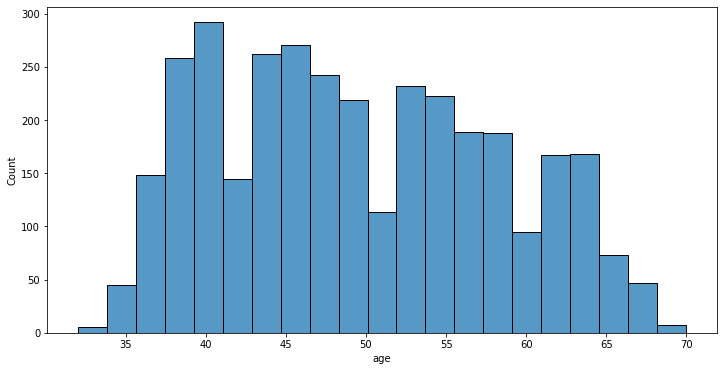

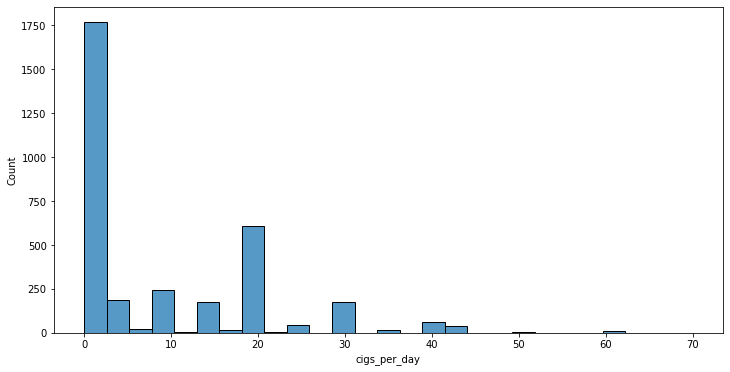

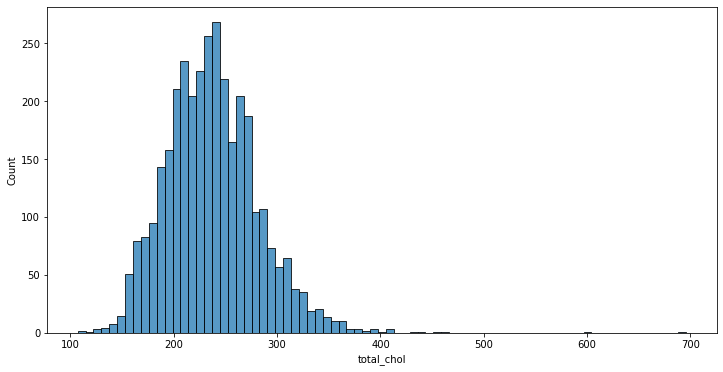

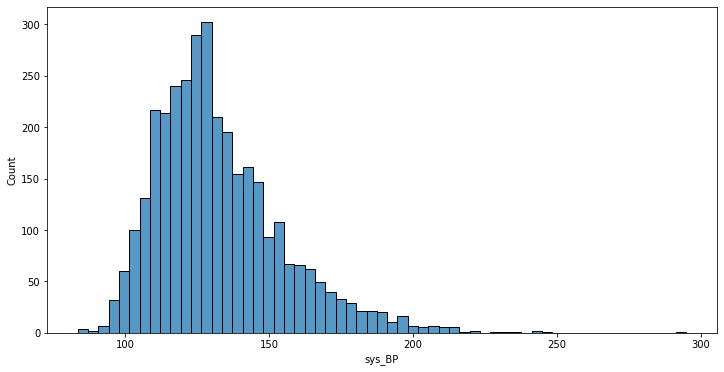

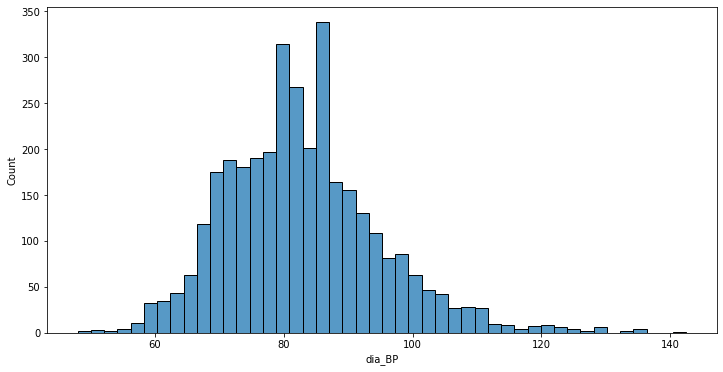

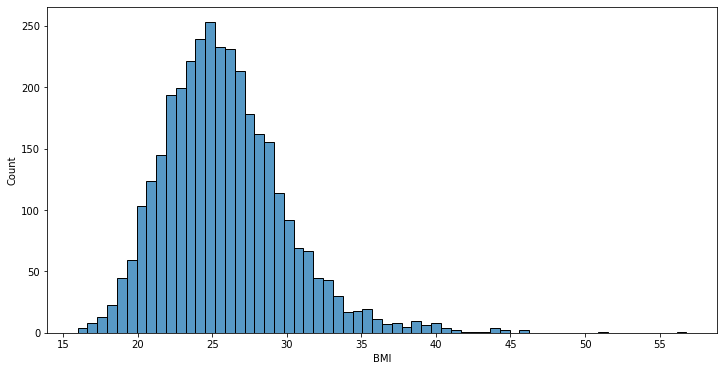

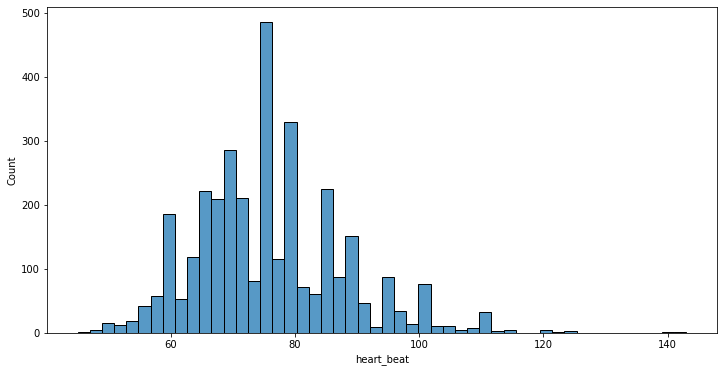

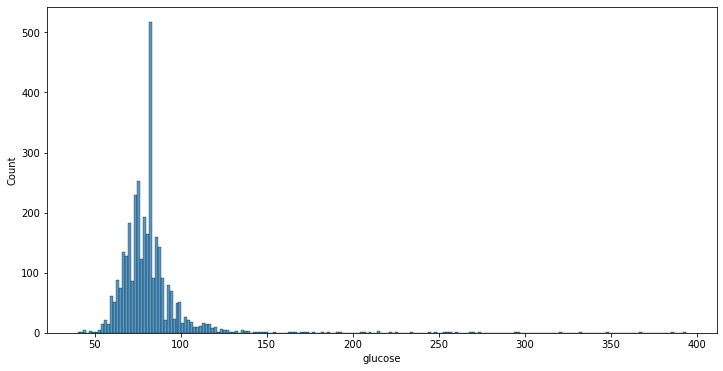

In [19]:
# Plotting The Distribution Of Data In Each Numerical Column

for i in num_col:
  plt.figure(figsize=(12,6))
  sns.histplot(df[i])



---



**Bivariate Analysis For Categorical Vs Target Variable**


---



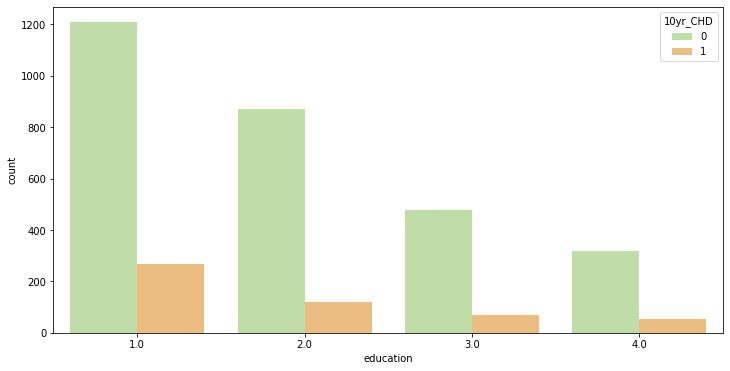

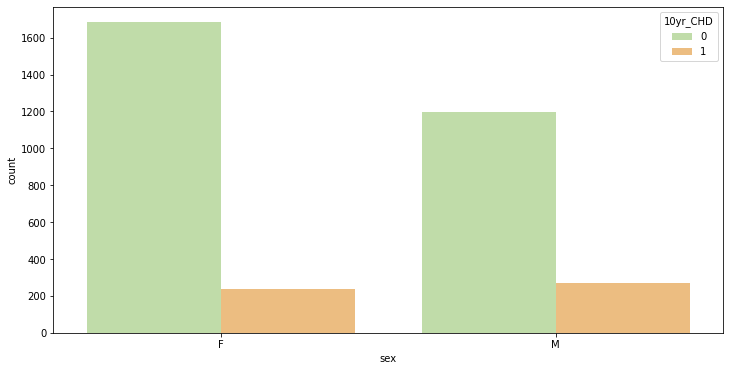

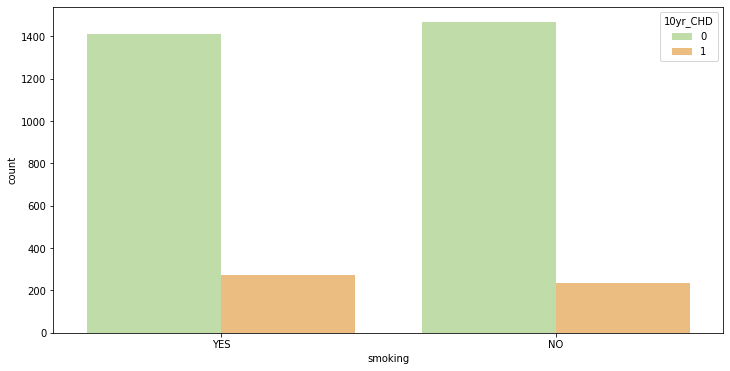

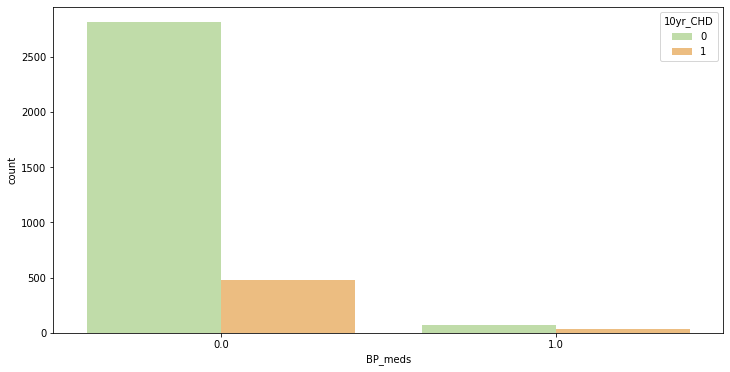

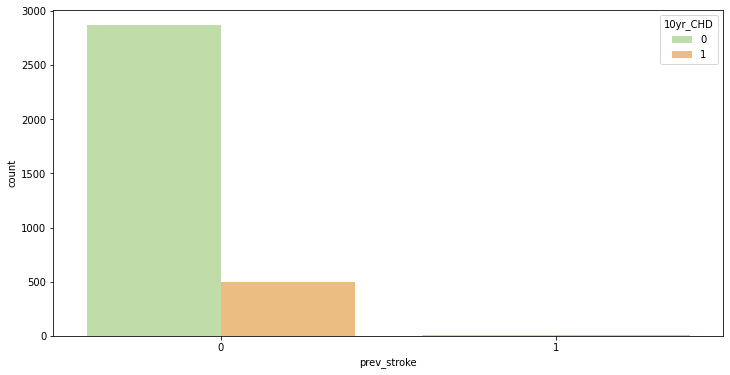

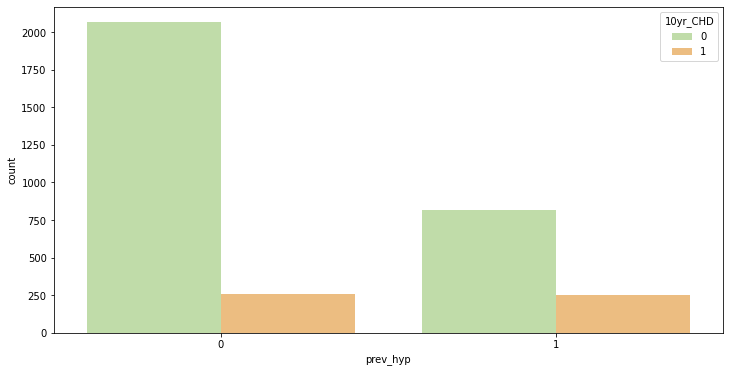

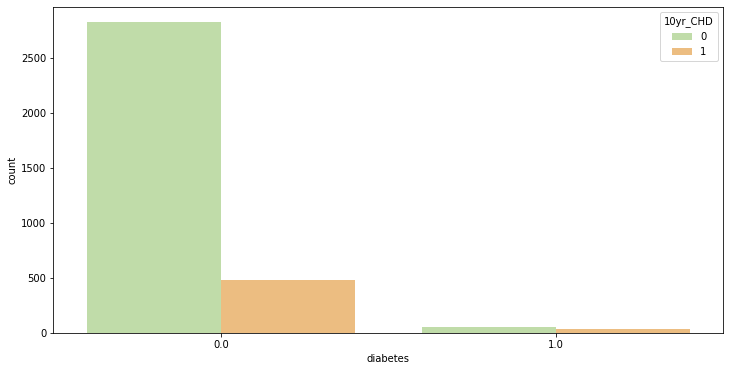

In [20]:
# Plotting the Count Of Each Category In Comparison With Risk

for i in cat_col:
  if i!='10yr_CHD':
    plt.figure(figsize=(12,6))
    sns.countplot(x=i, hue='10yr_CHD', data=df, palette='Spectral_r')





---


**Bivariate Analysis For Numerical Vs Target Variable**


---



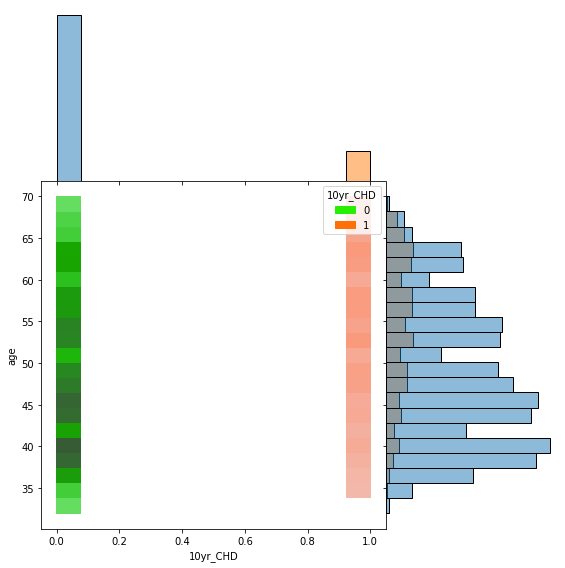

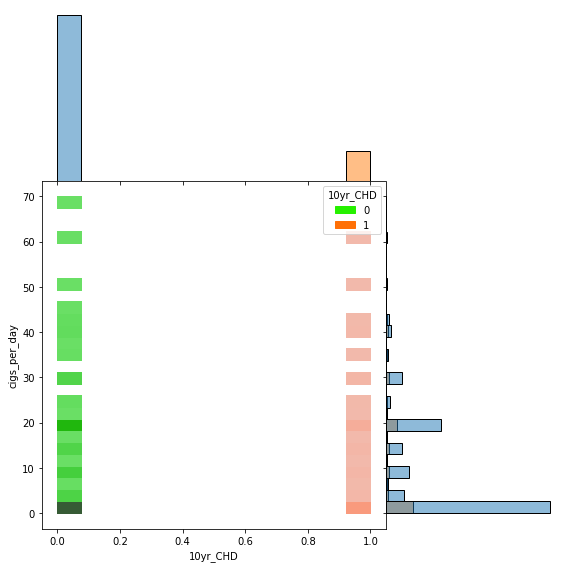

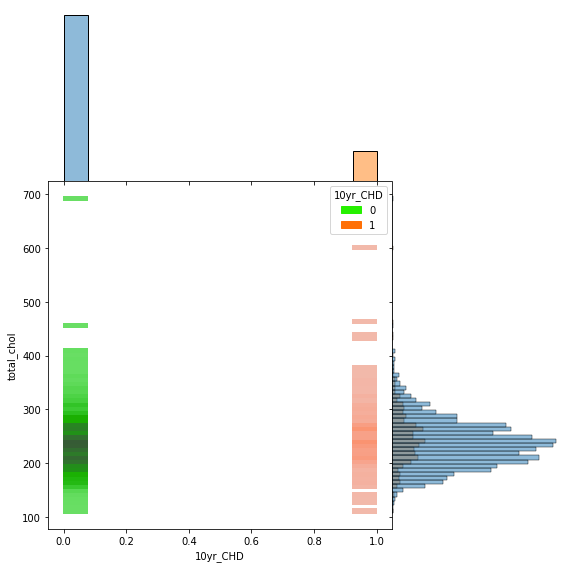

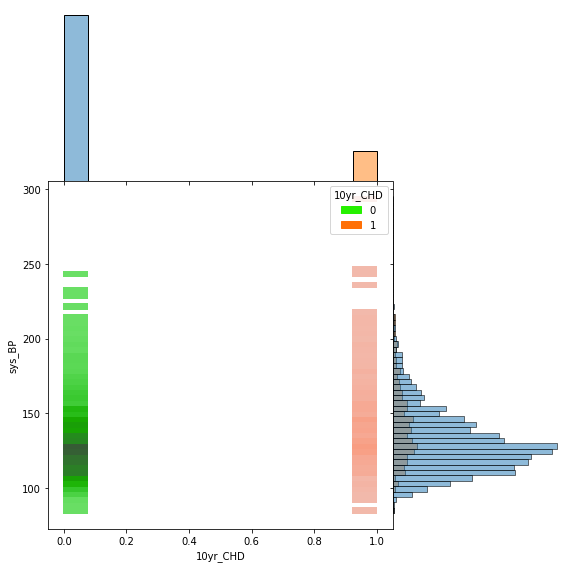

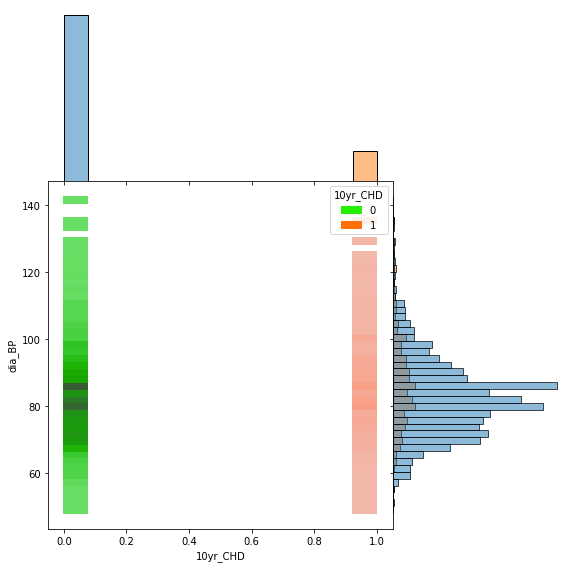

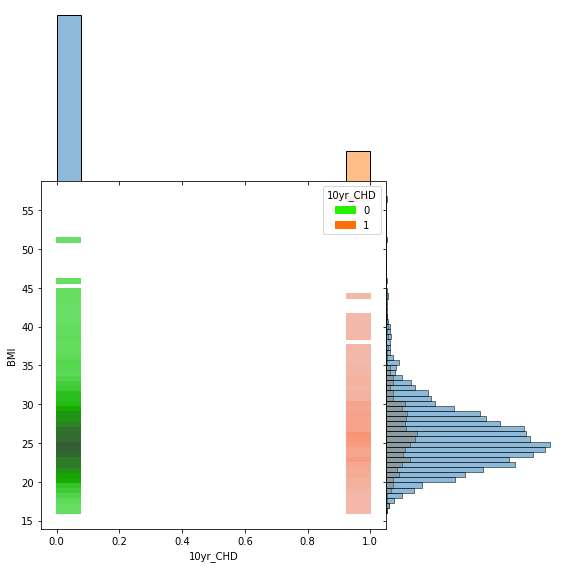

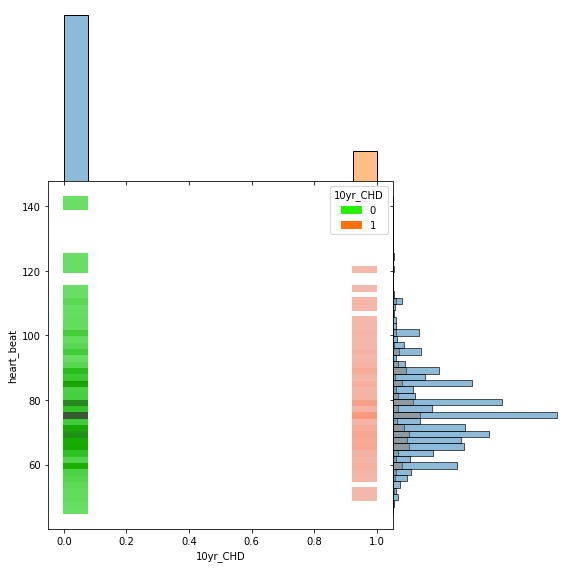

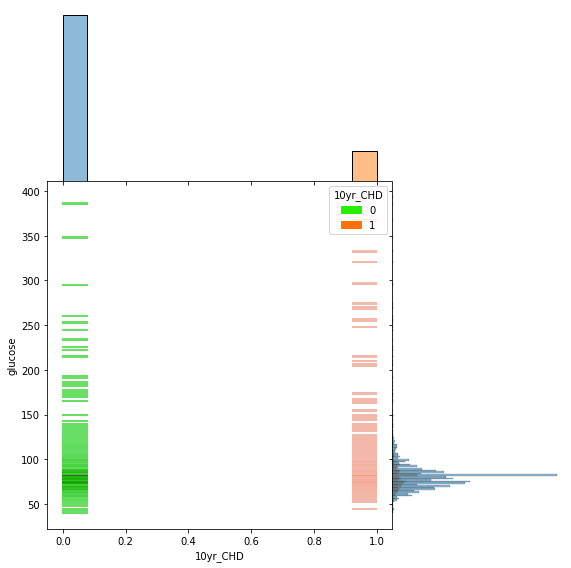

In [21]:
# Plotting The Intensity Of Risk Factor In Continuous Variables Using Joint Plot

for i in num_col:
  sns.jointplot(data=df,x='10yr_CHD',y=i,hue='10yr_CHD',palette='gist_ncar',kind='hist',ratio=2, space=0,height=8)



---


**Multivariate Ananlysis**


---



**a) Age Vs Categorical Variables Along With CHD**

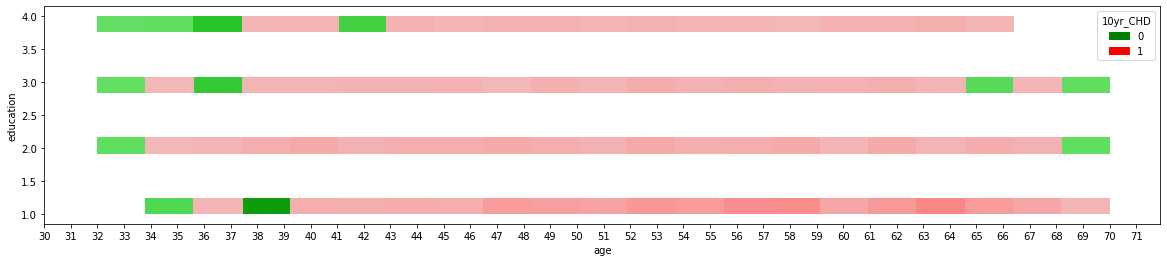

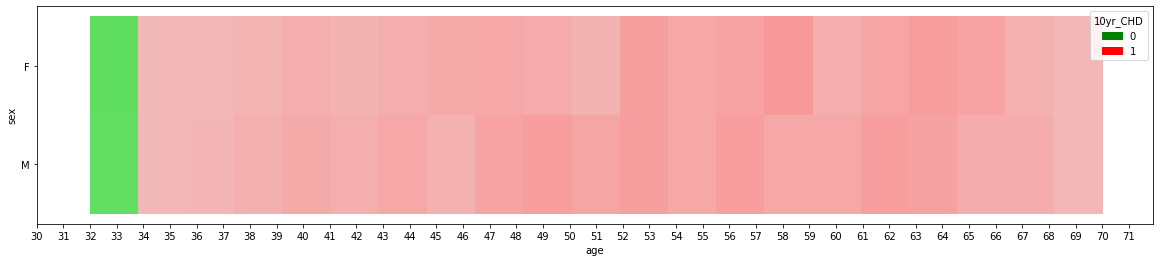

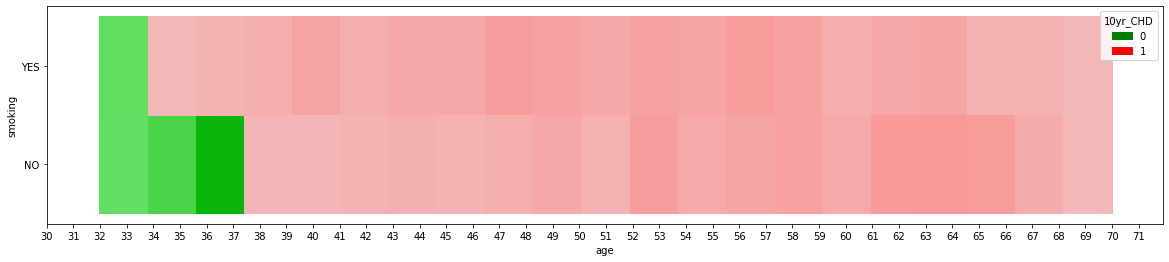

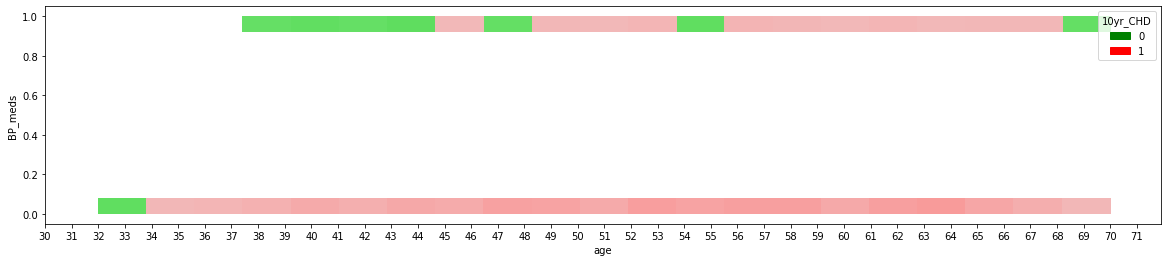

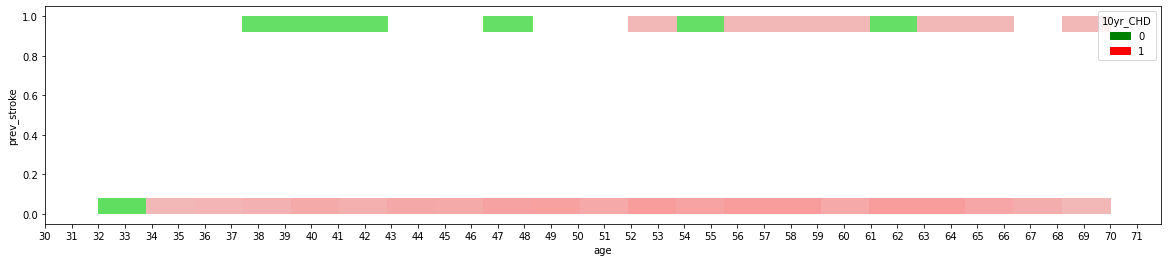

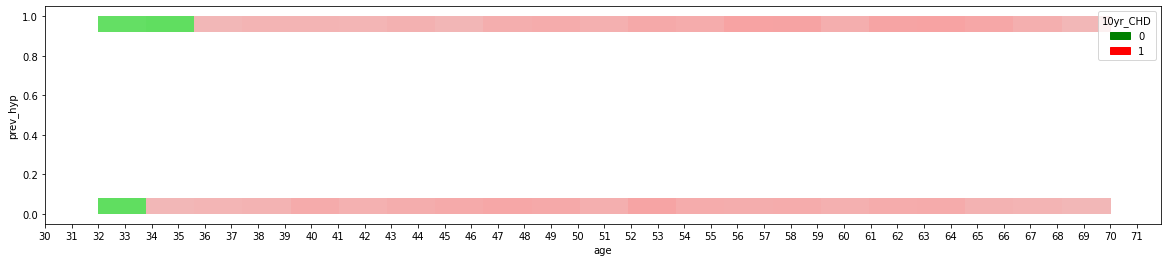

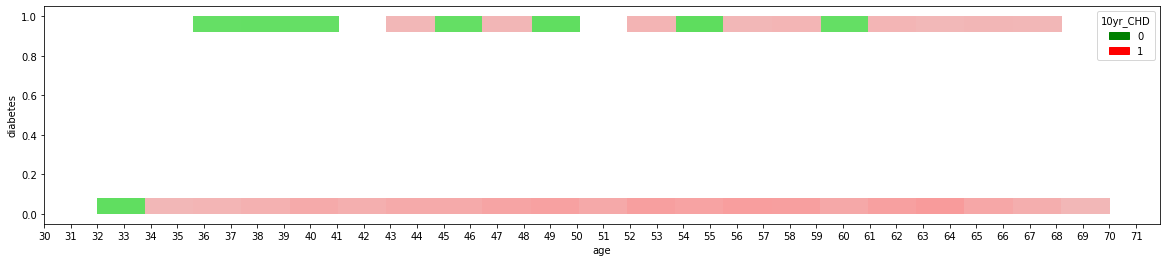

In [22]:
# Visualizing The Effects Of Age On Categorical Columns

for i in cat_col:
  if i!='10yr_CHD':
    plt.figure(figsize=(20,4))
    sns.histplot(x='age',y=i,data=df,hue='10yr_CHD',palette=['green','red'])
    plt.xticks(np.arange(30, 72, 1))
    plt.show()

**b) Systolic BP Vs Categorical Variables Along With CHD**

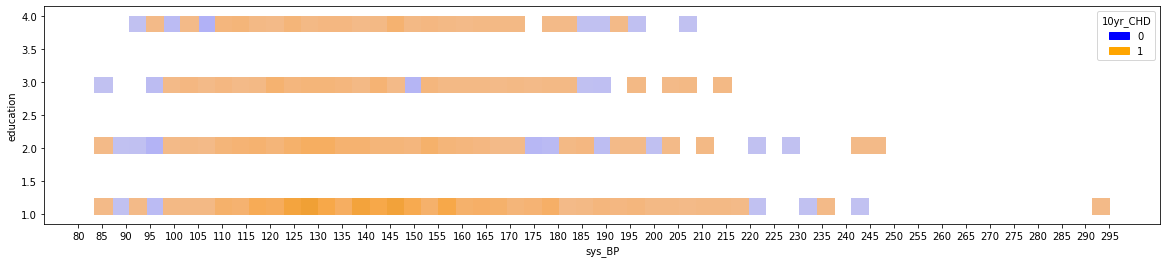

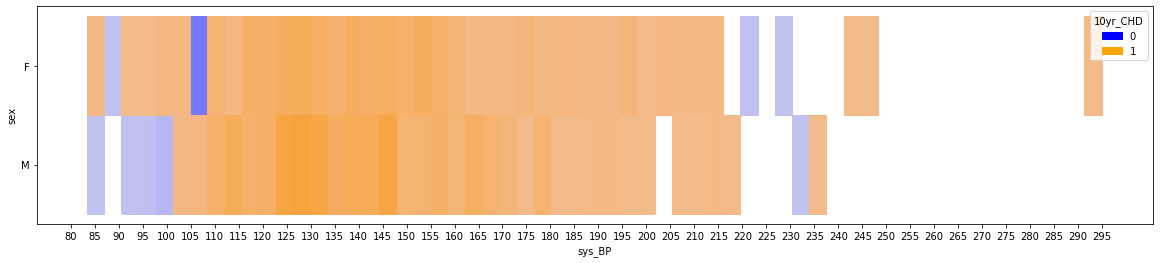

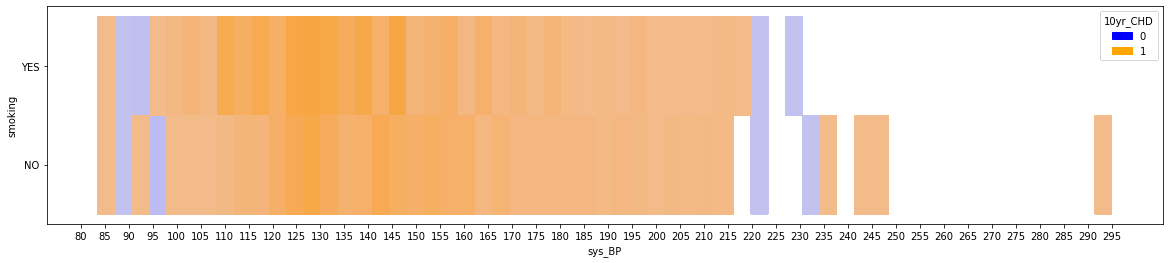

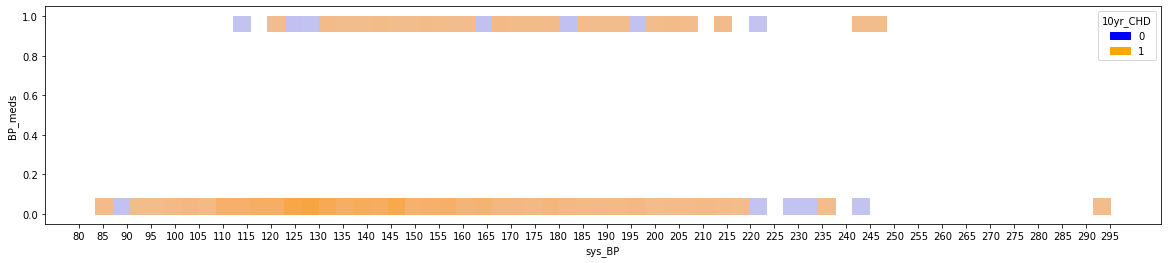

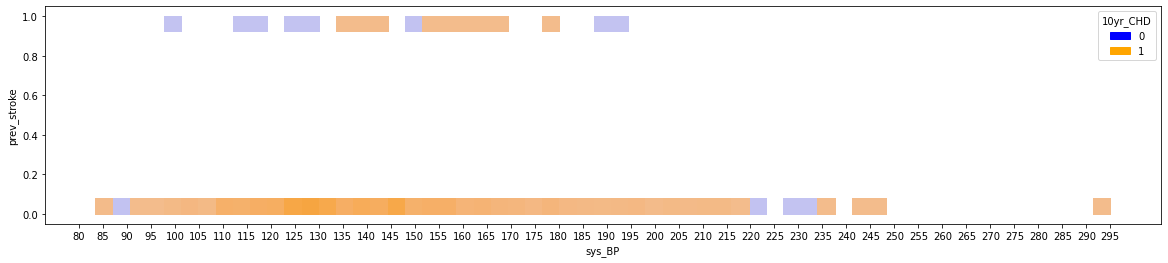

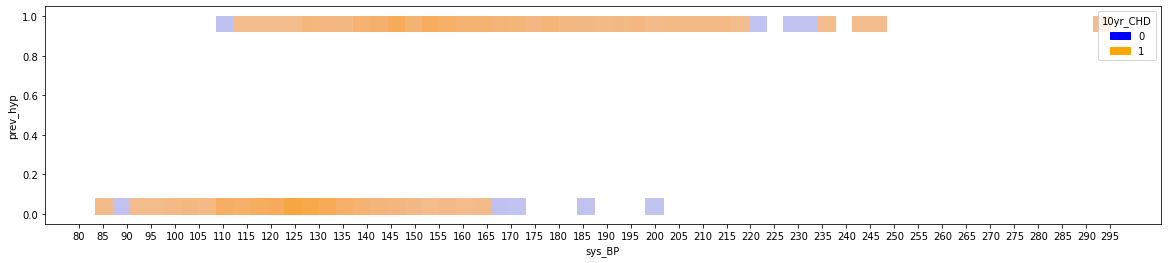

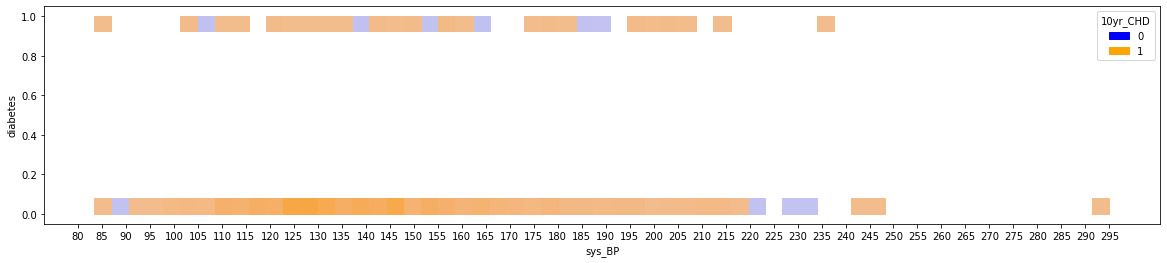

In [23]:
# Visualizing The Effects Of BP On Categorical Columns

for i in cat_col:
  if i!='10yr_CHD':
    plt.figure(figsize=(20,4))
    sns.histplot(x='sys_BP',y=i,data=df,hue='10yr_CHD',palette=['blue','orange'])
    plt.xticks(np.arange(80, 300, 5))
    plt.show()

**c) Glucose Vs Categorical Variables Along With CHD**

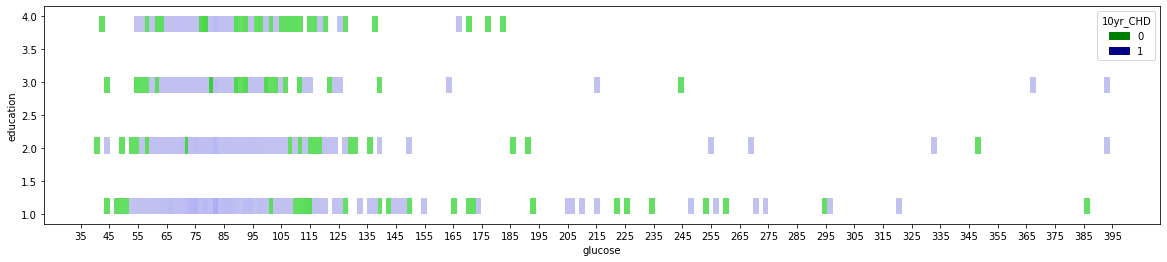

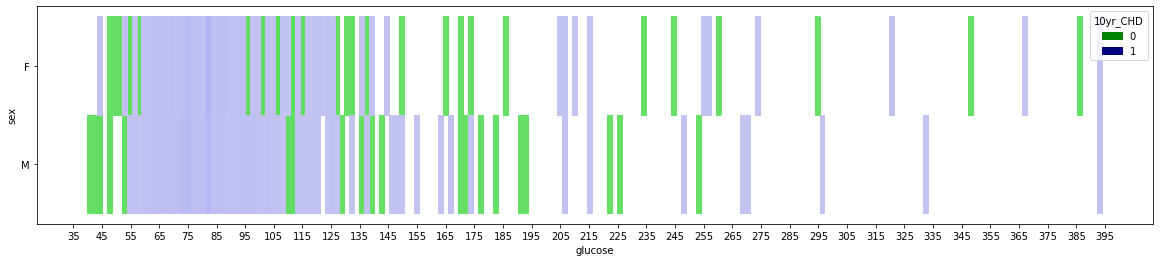

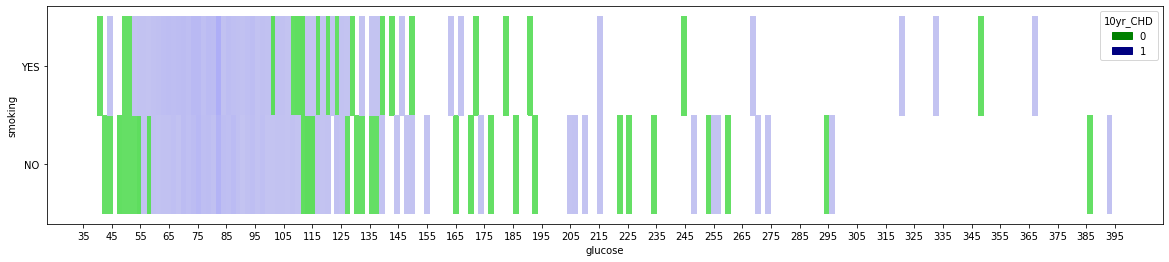

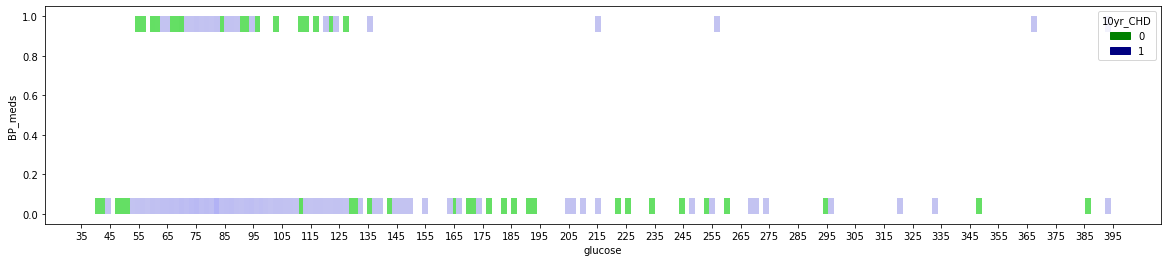

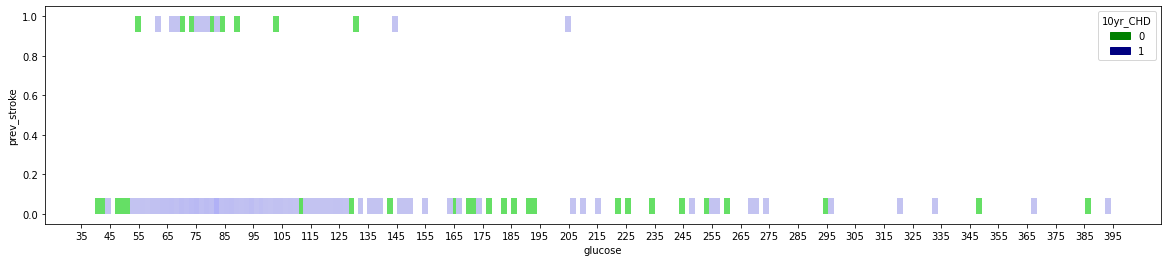

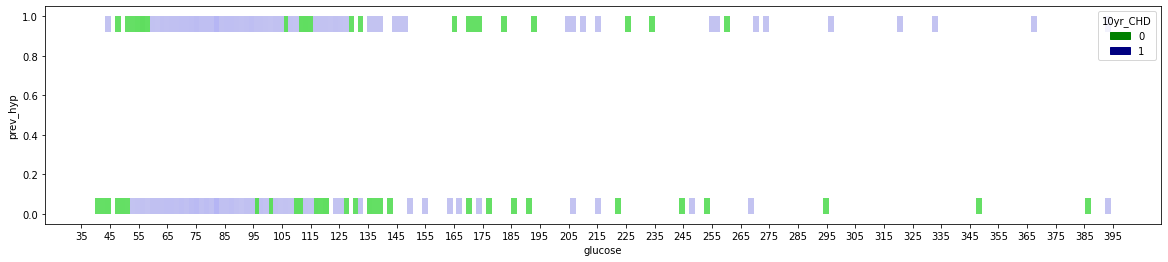

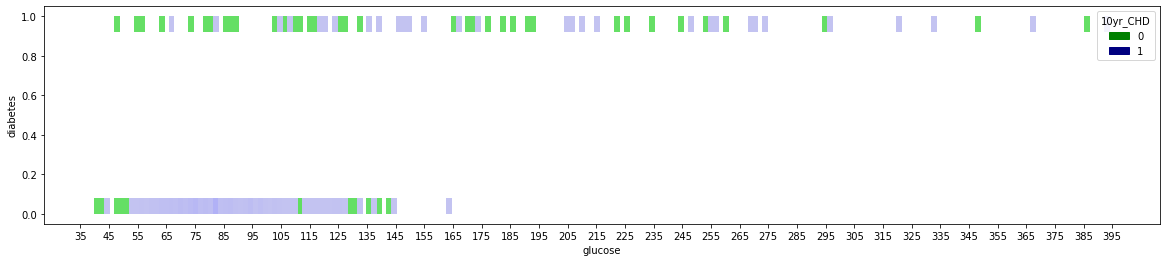

In [24]:
# Visualizing The Effects Of Glucose Levels On Categorical Columns

for i in cat_col:
  if i!='10yr_CHD':
    plt.figure(figsize=(20,4))
    sns.histplot(x='glucose',y=i,data=df,hue='10yr_CHD',palette=['green','navy'])
    plt.xticks(np.arange(35, 400, 10))
    plt.show()

**d) Total Cholestrol Vs Categorical Variables Along With CHD**

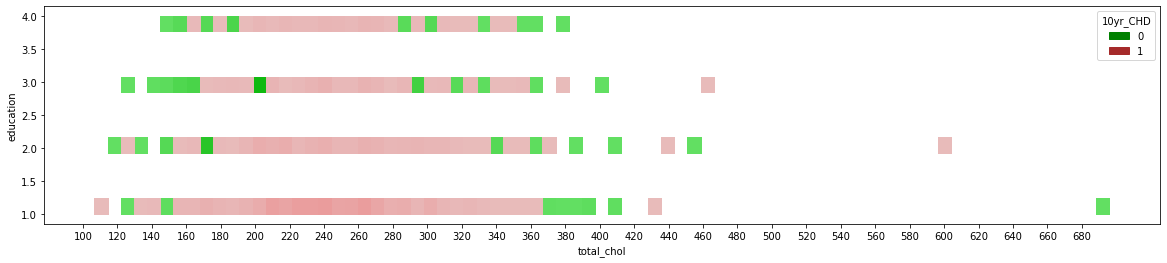

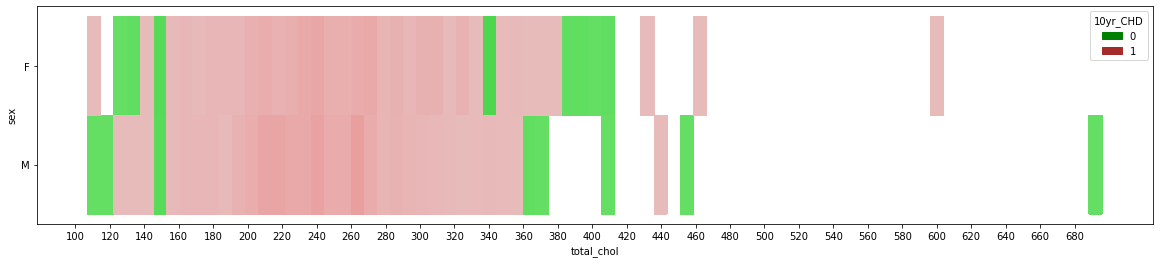

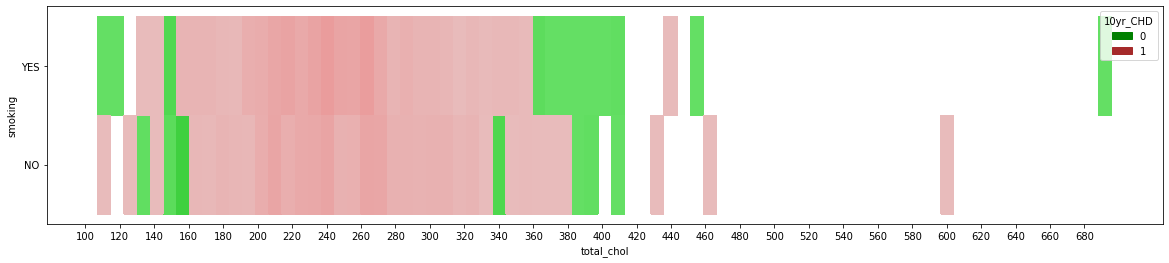

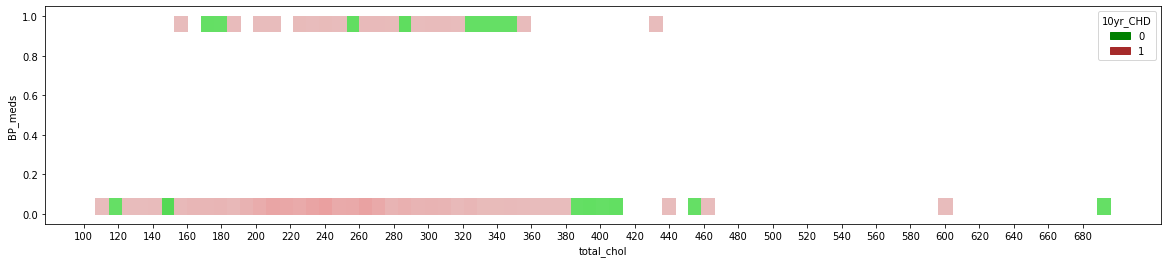

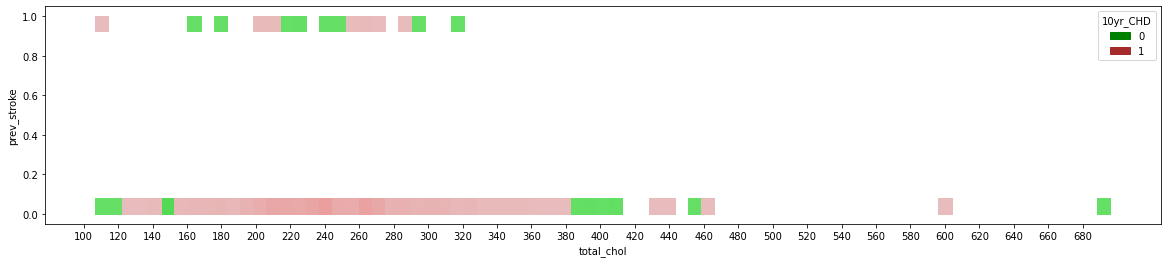

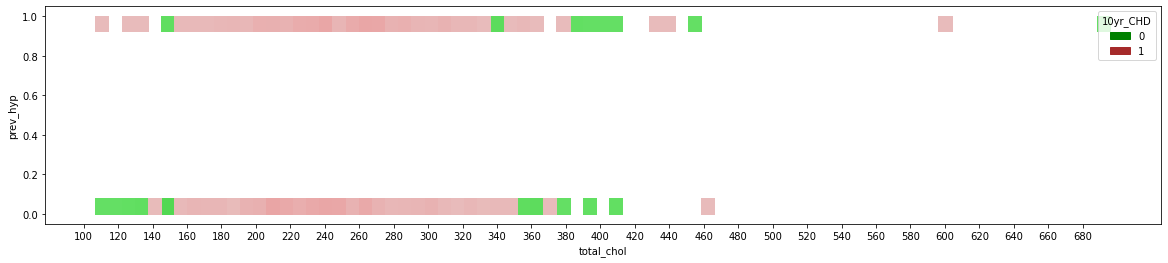

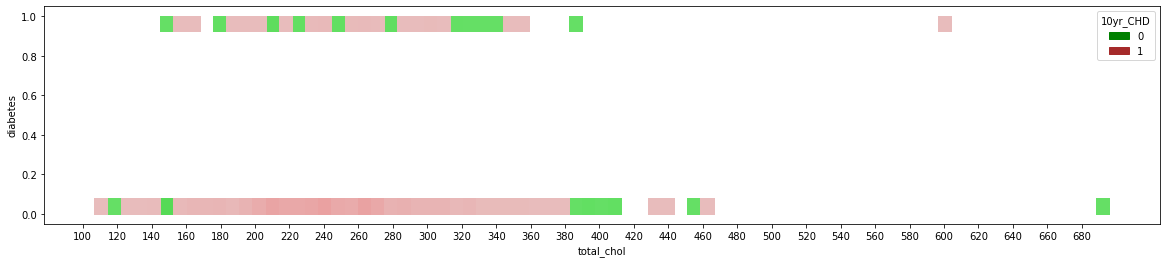

In [25]:
# Visualizing The Effects Of Glucose Levels On Categorical Columns

for i in cat_col:
  if i!='10yr_CHD':
    plt.figure(figsize=(20,4))
    sns.histplot(x='total_chol',y=i,data=df,hue='10yr_CHD',palette=['green','brown'])
    plt.xticks(np.arange(100,700,20))
    plt.show()

**e) Age Vs Numerical Variables Along With CHD**

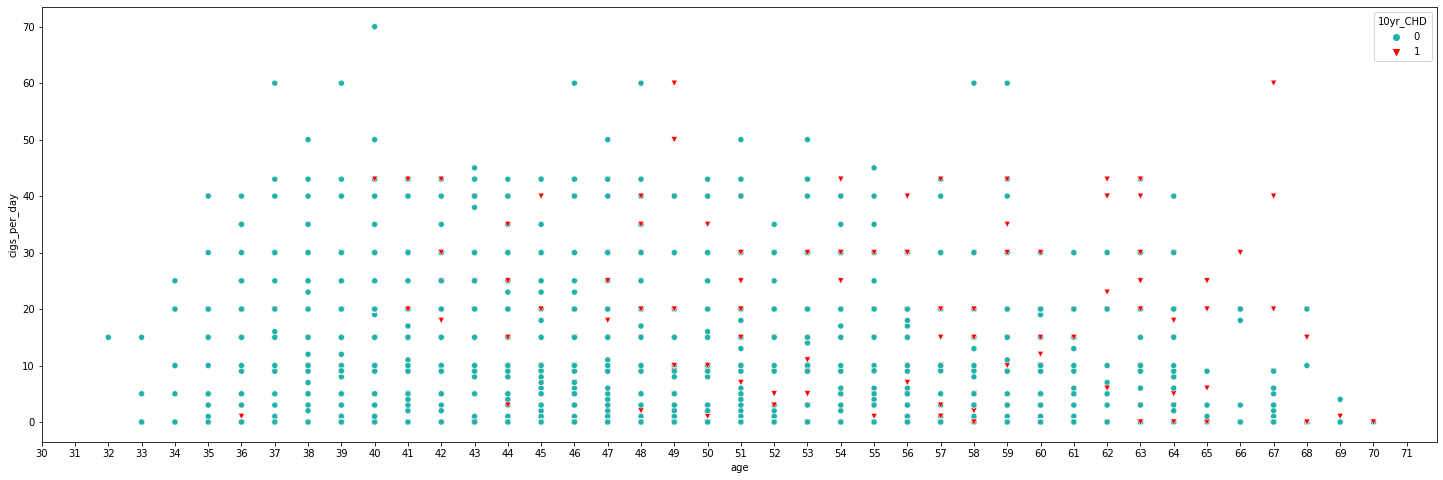

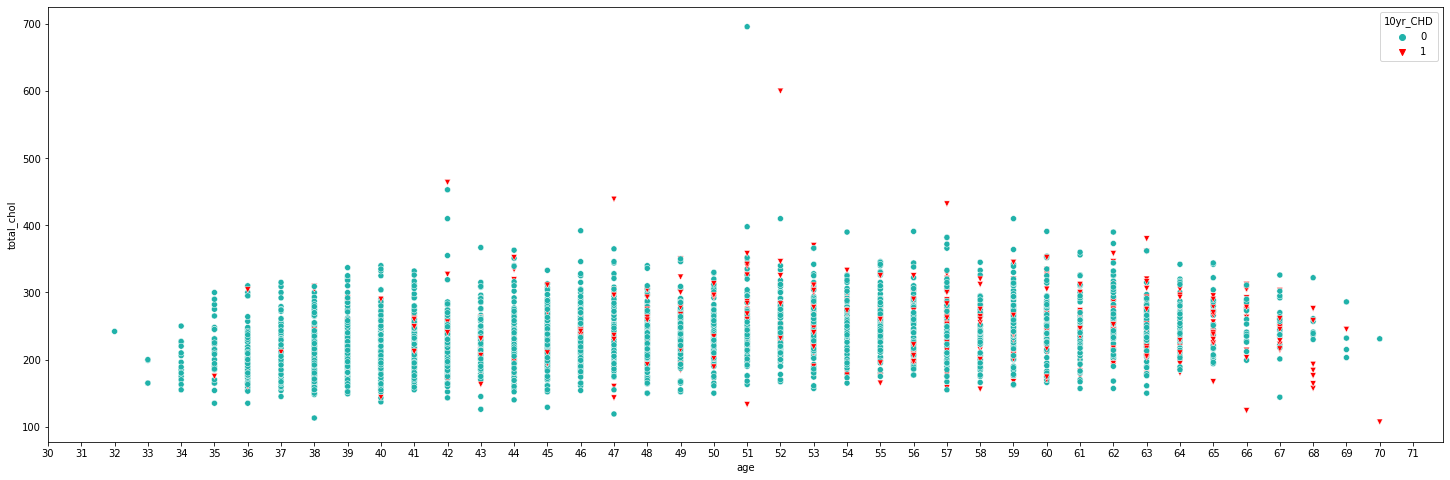

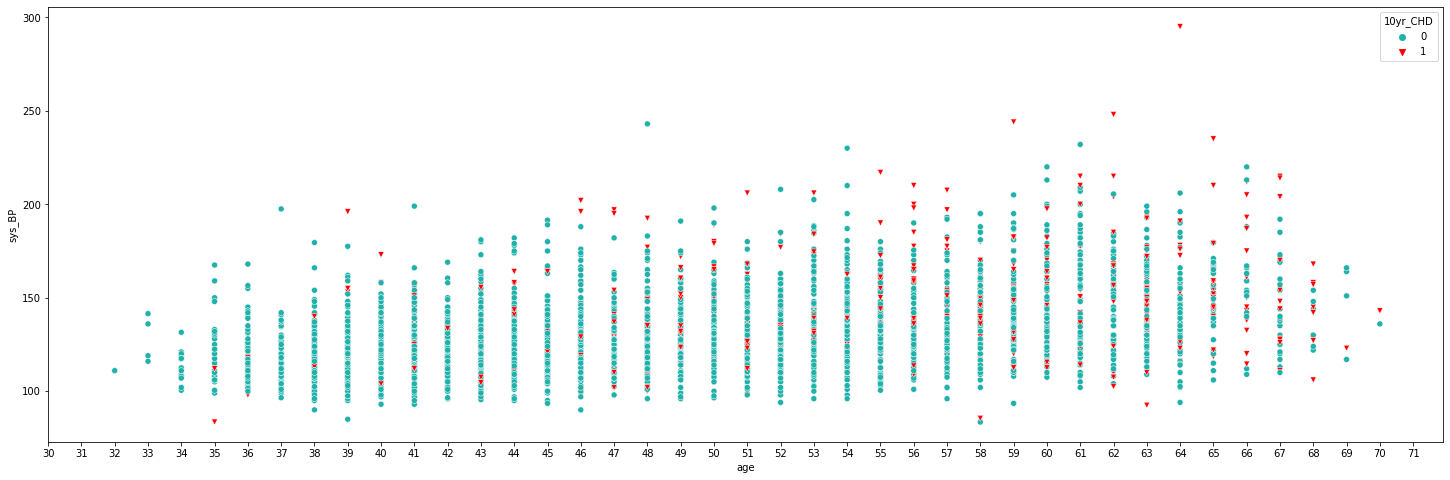

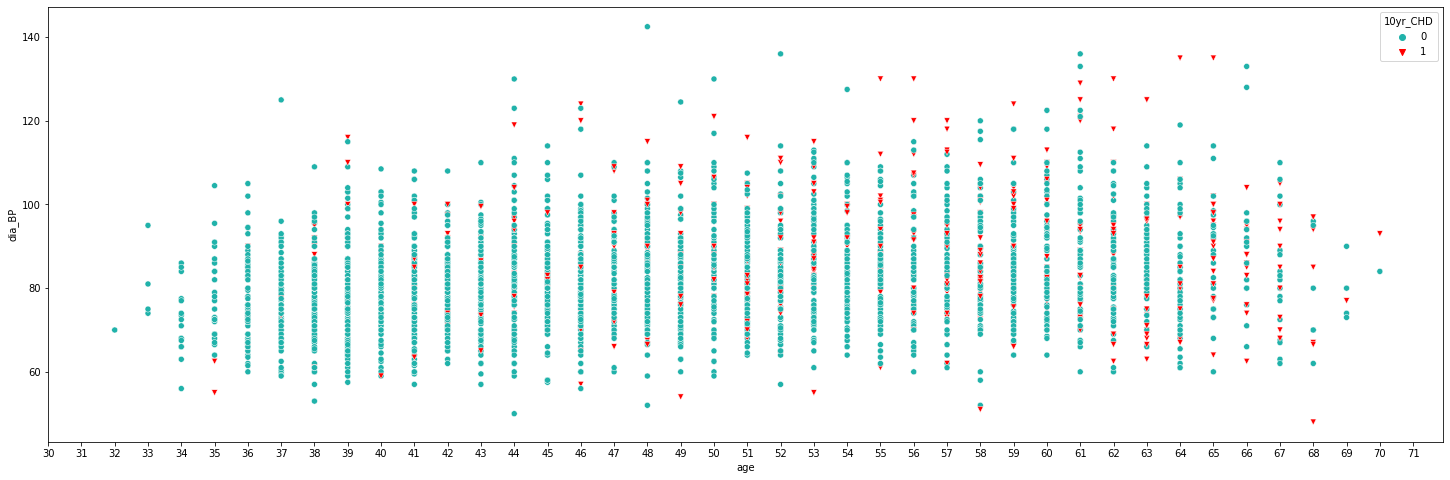

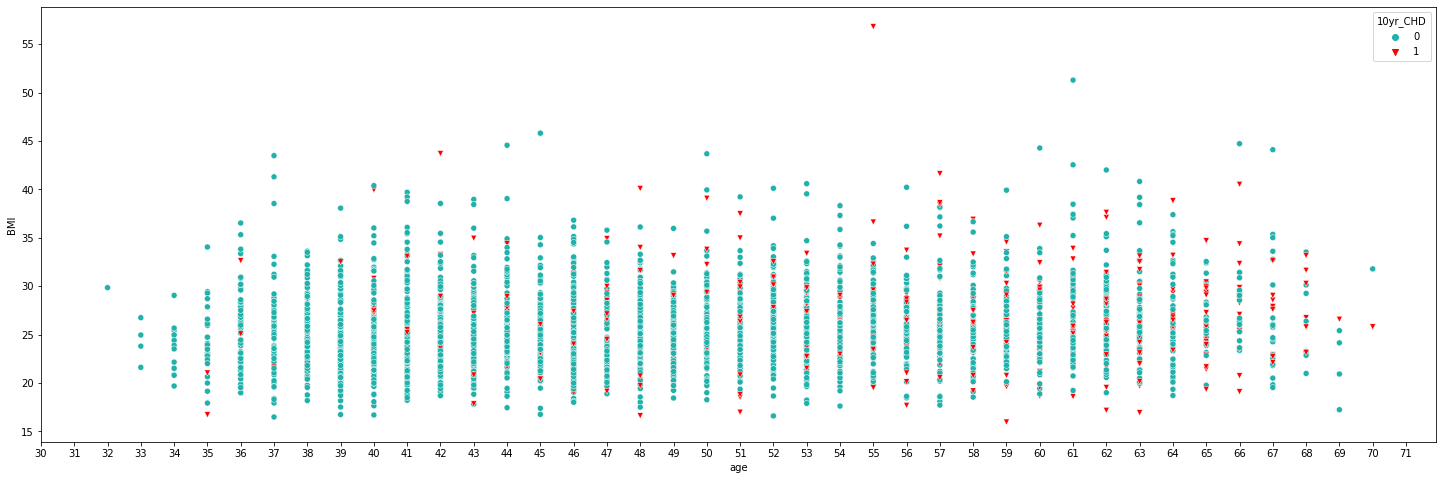

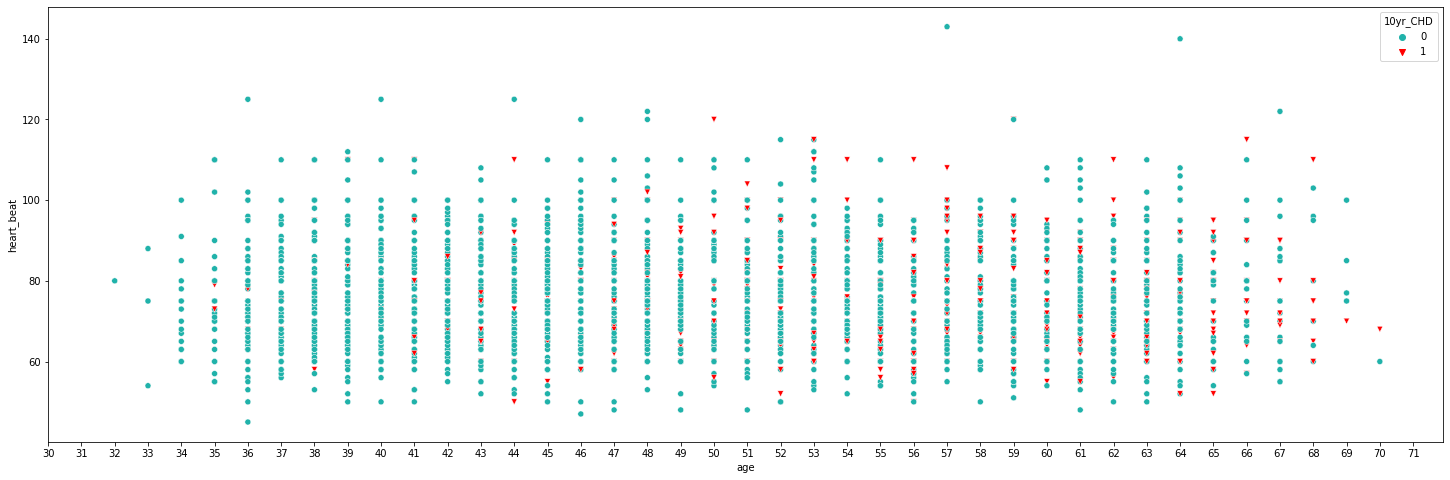

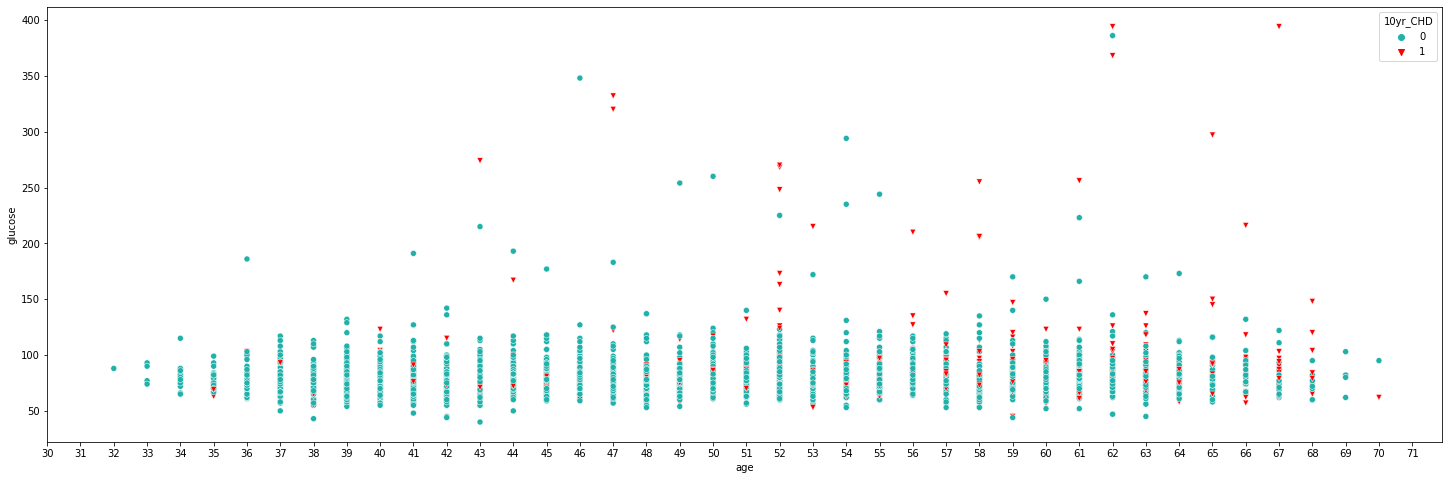

In [26]:
# Visualizing The Effects Of Age On Numericl Columns

markers = {0: "o", 1: "v"}
for i in num_col:
  if i!='age':
    plt.figure(figsize=(25,8))
    sns.scatterplot(data=df, x='age', y=i, hue='10yr_CHD', style='10yr_CHD', palette=['lightseagreen','red'], markers=markers)
    plt.xticks(np.arange(30,72,1))
    plt.show()

**f) Systolic BP Vs Numerical Variables Along With CHD**

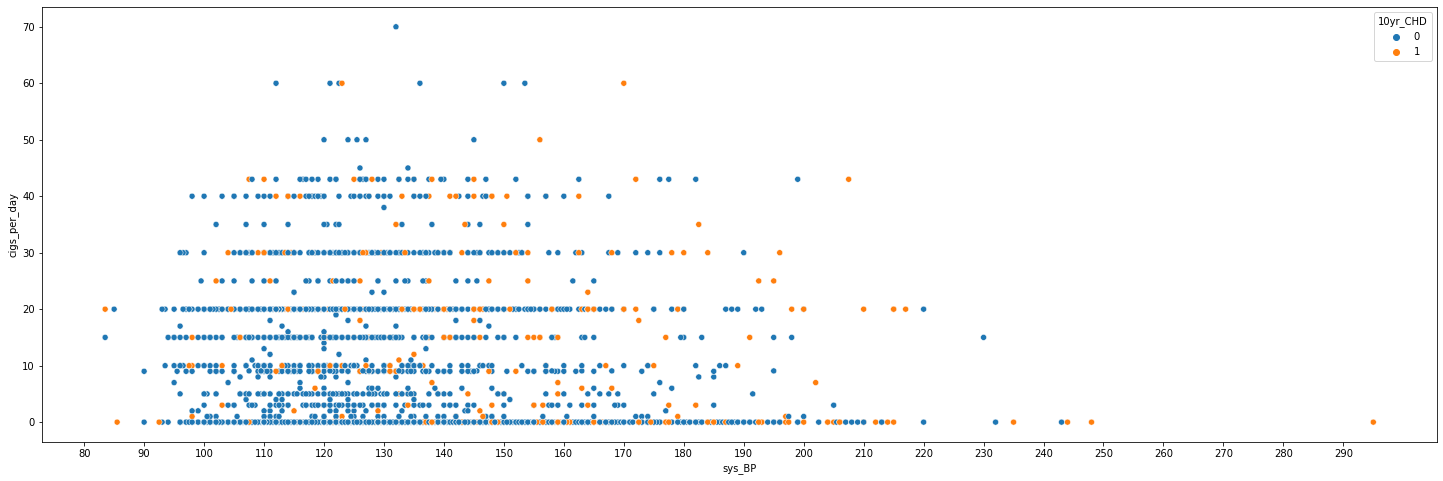

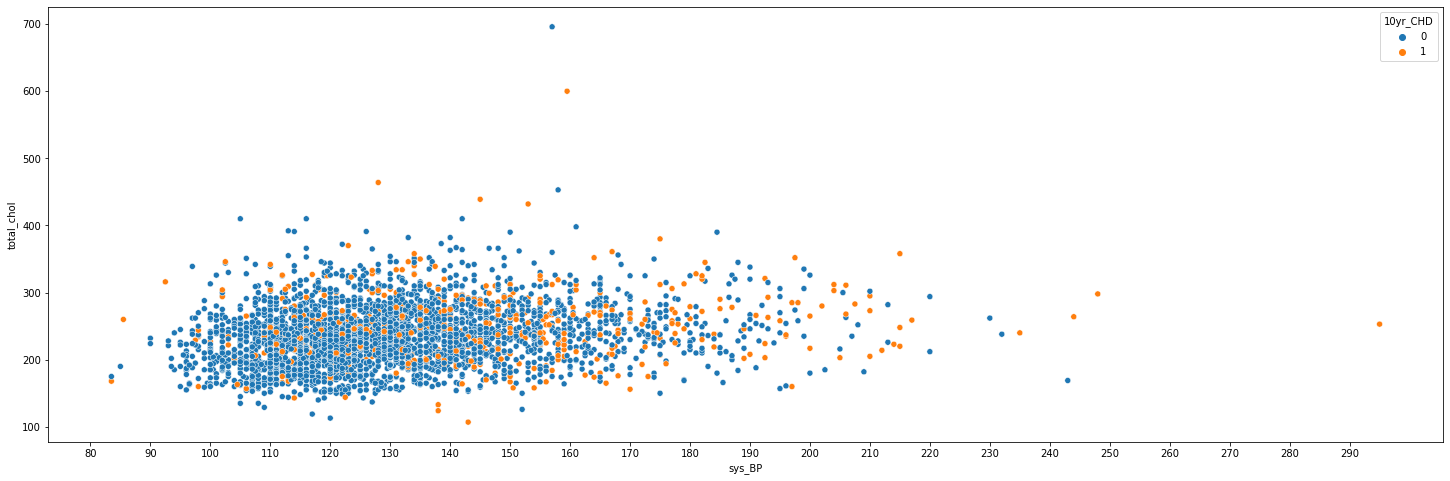

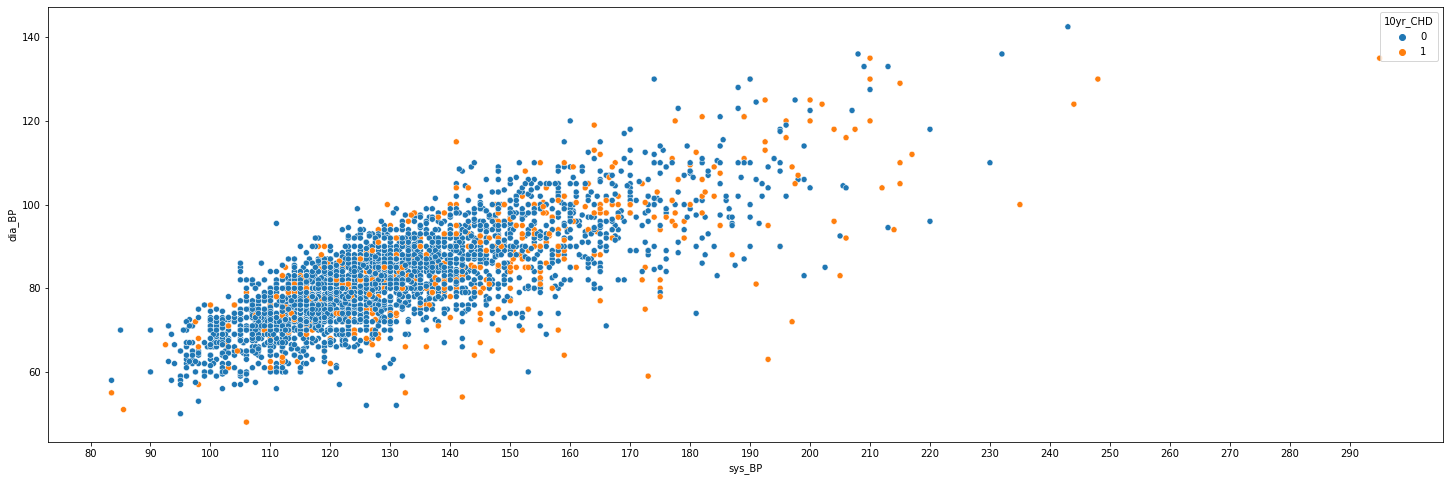

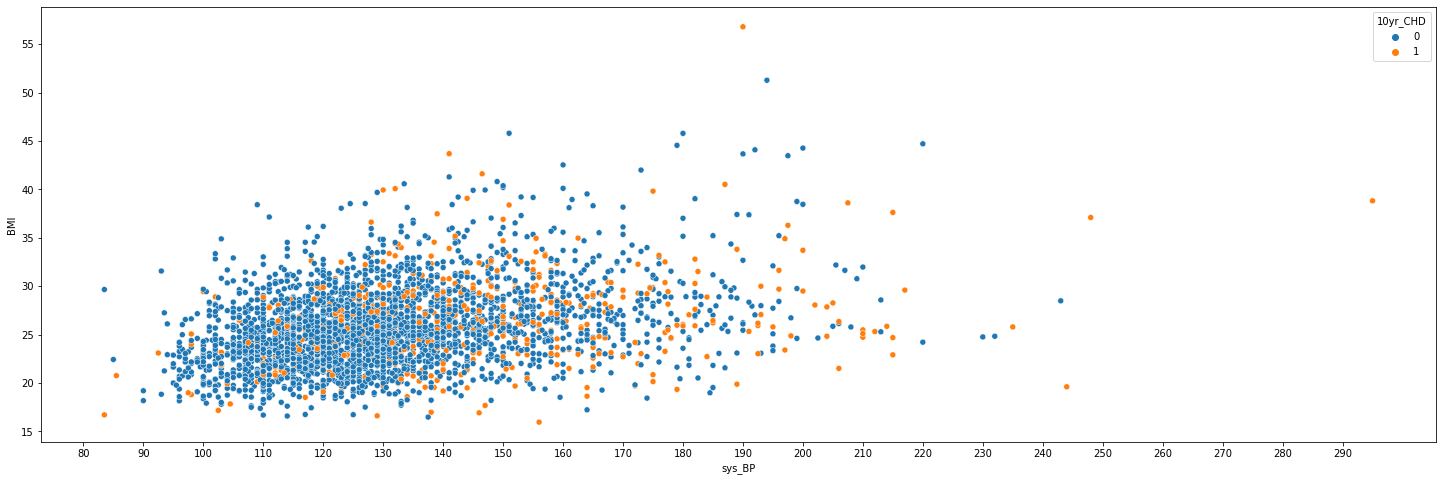

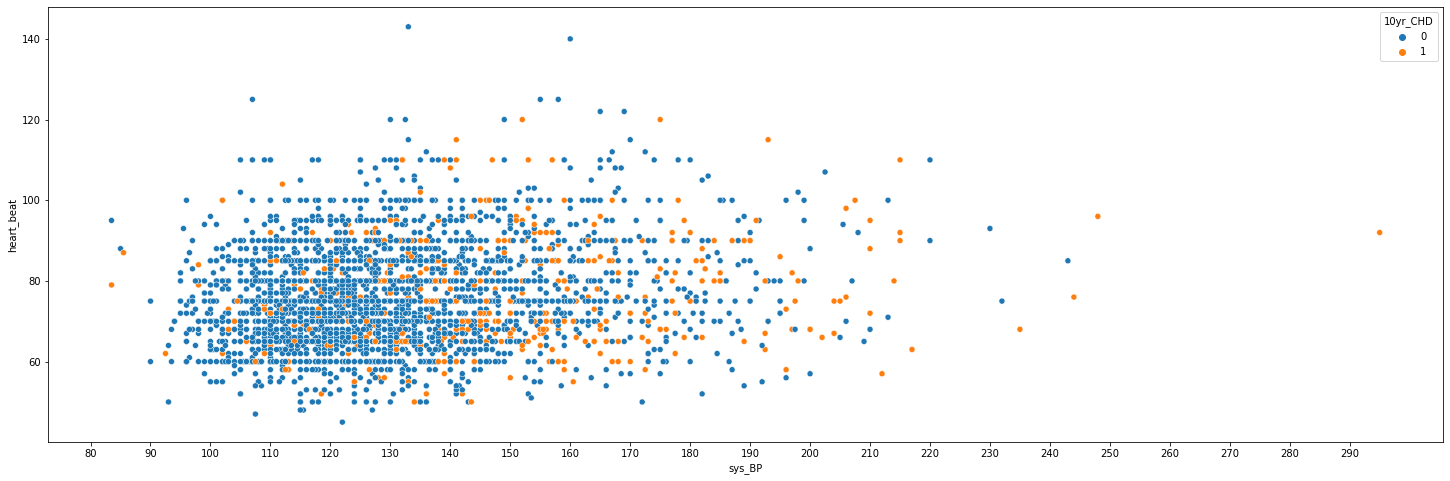

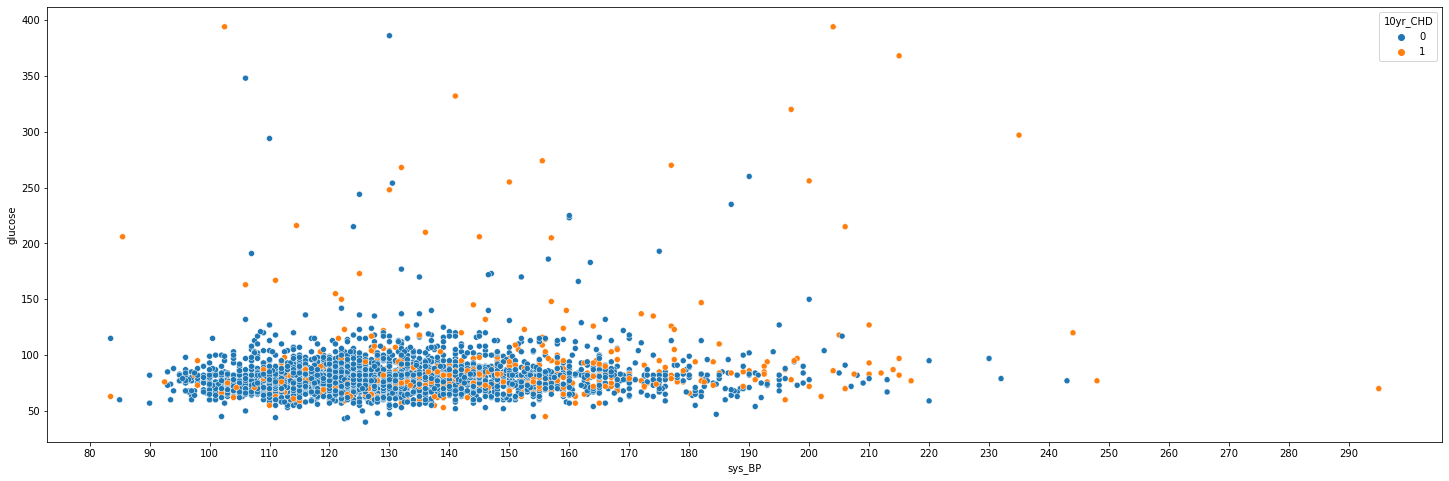

In [27]:
# Visualizing The Effects Of Systolic BP On Numericl Columns

for i in num_col:
  if i!='sys_BP' and i!='age':
    plt.figure(figsize=(25,8))
    sns.scatterplot(x='sys_BP', y=i, data=df, hue='10yr_CHD')
    plt.xticks(np.arange(80,300,10))
    plt.show()

**g) Glucose Vs Numerical Variables Along With CHD**

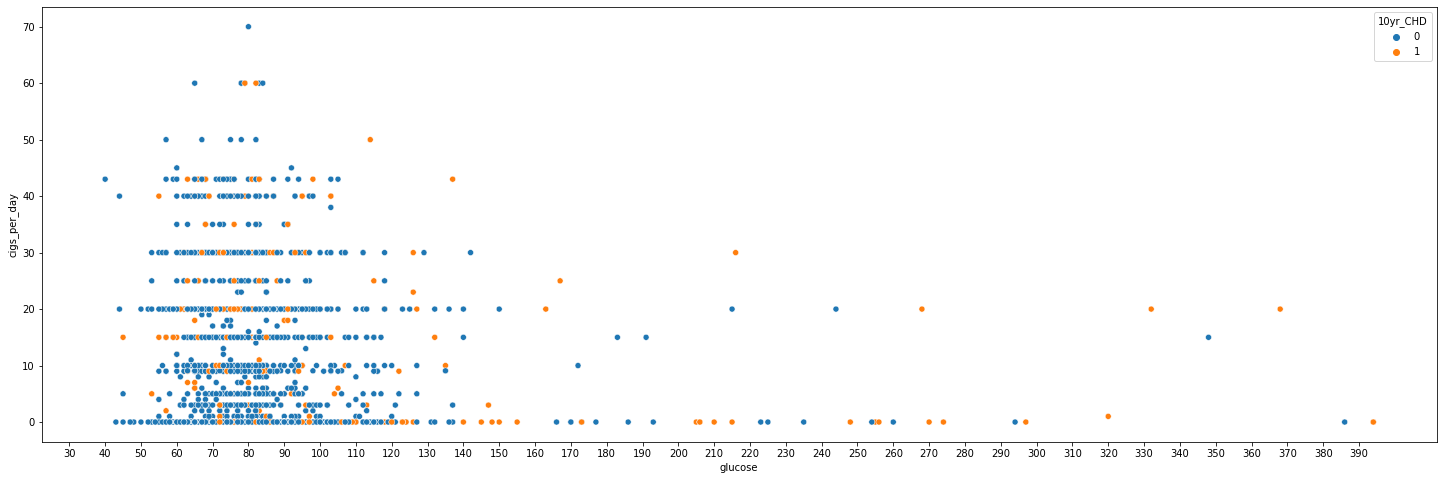

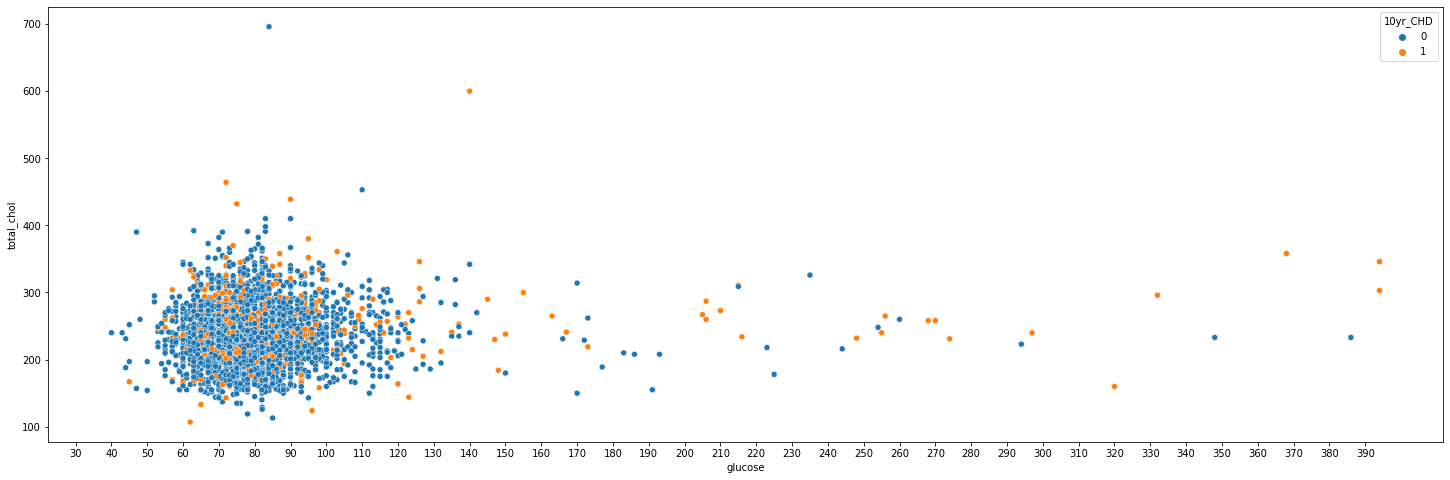

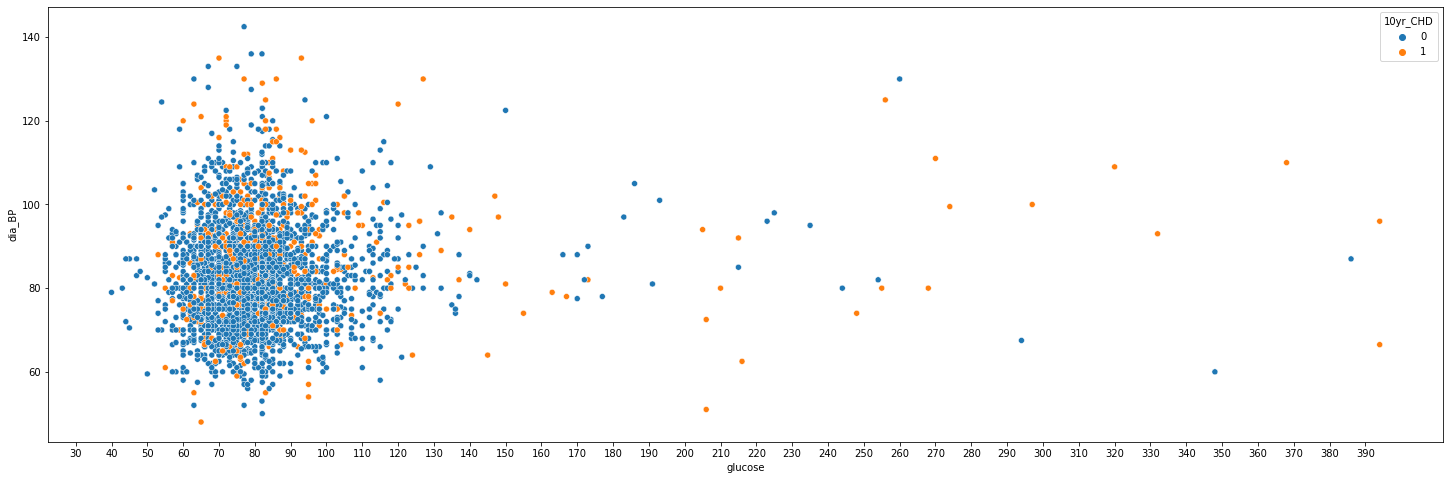

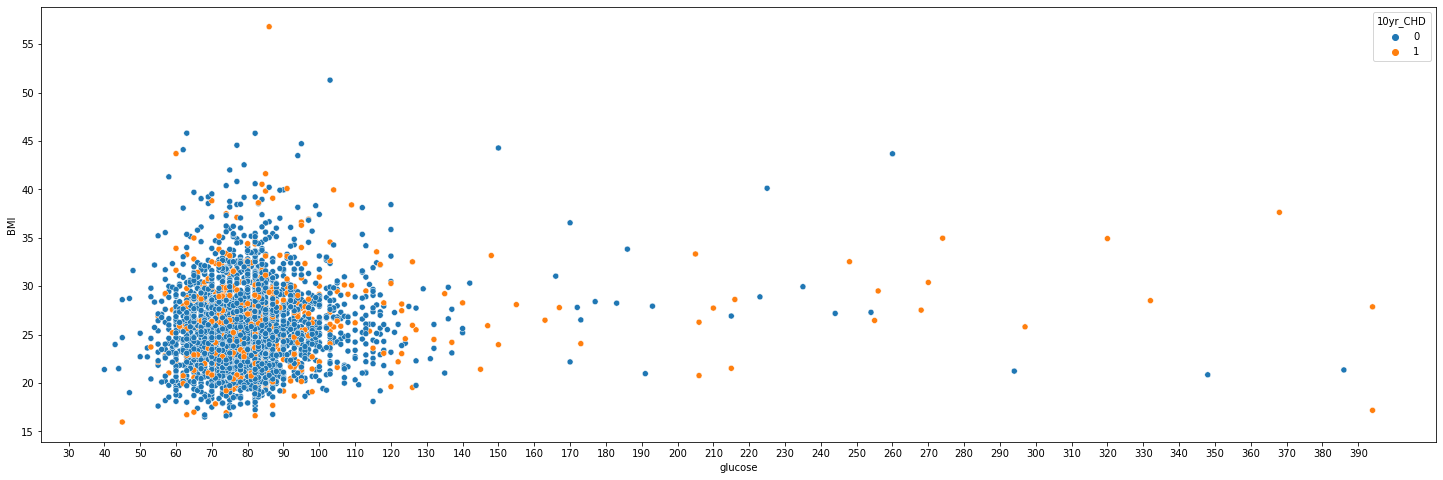

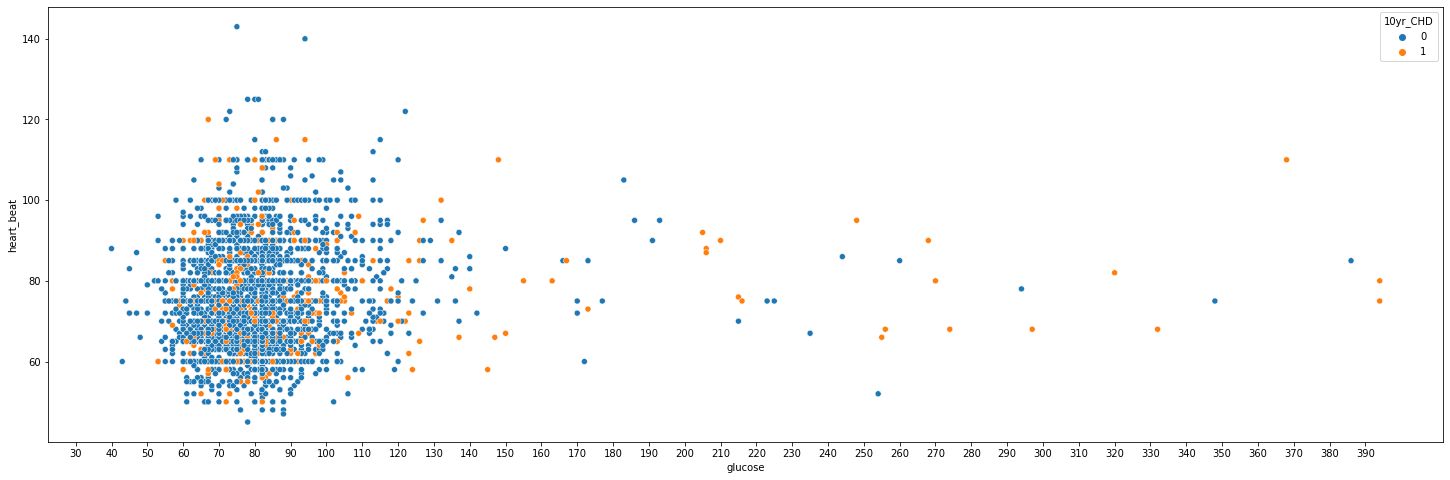

In [28]:
# Visualizing The Effects Of Glucose On Numericl Columns

for i in num_col:
  if i!='glucose' and i!='age' and i!='sys_BP':
    plt.figure(figsize=(25,8))
    sns.scatterplot(x='glucose', y=i, data=df, hue='10yr_CHD')
    plt.xticks(np.arange(30,400,10))
    plt.show()

**h) Total Cholestrol Vs Numerical Variables Along With CHD**

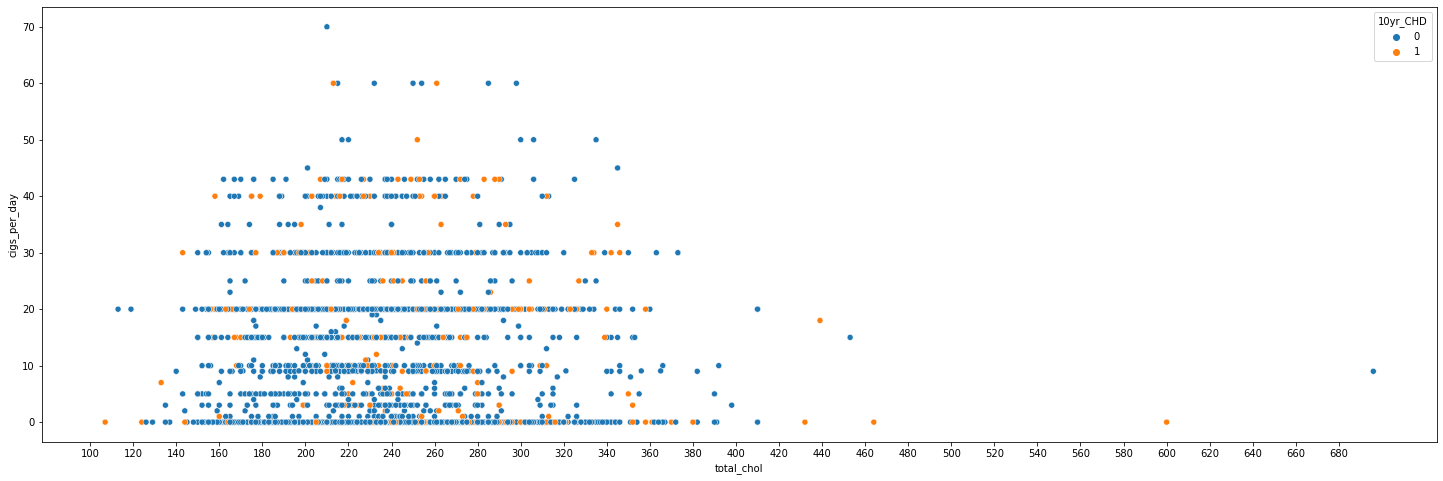

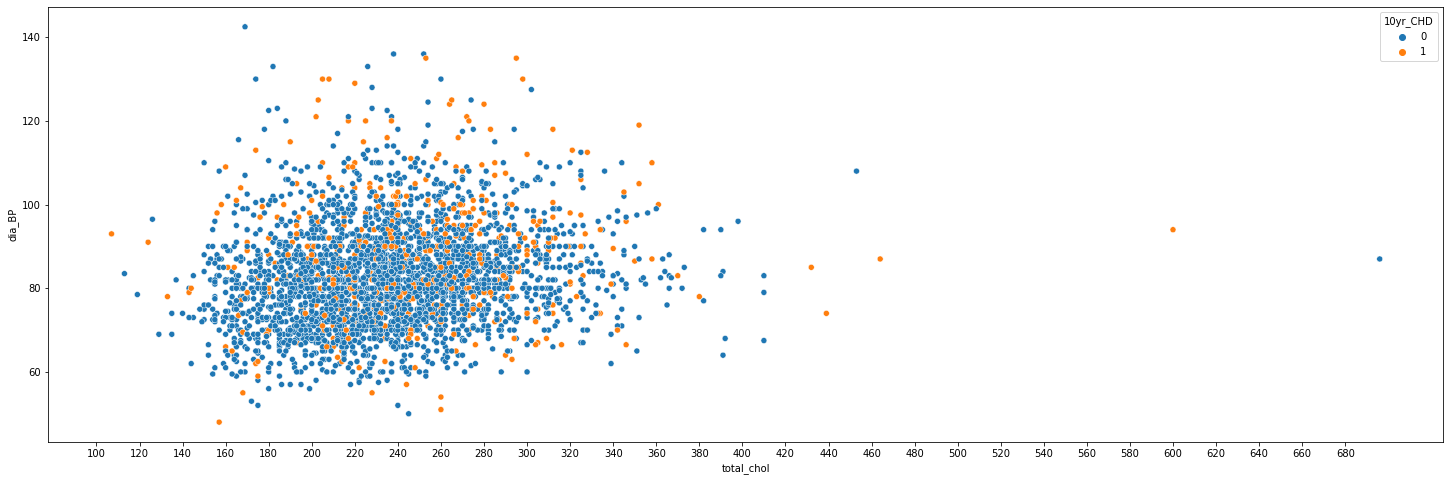

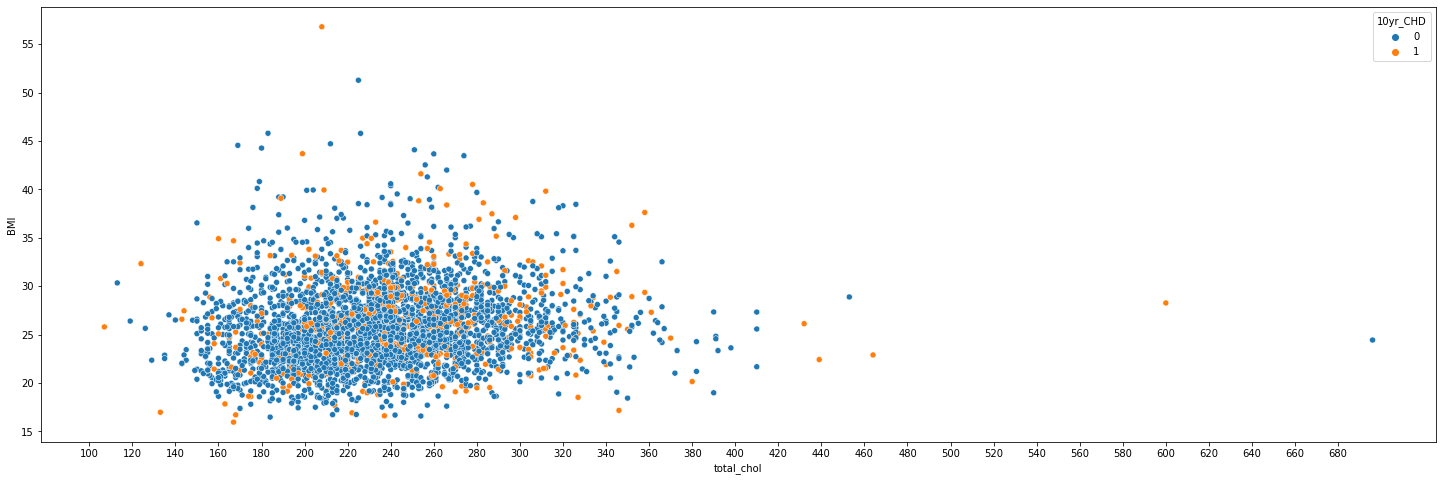

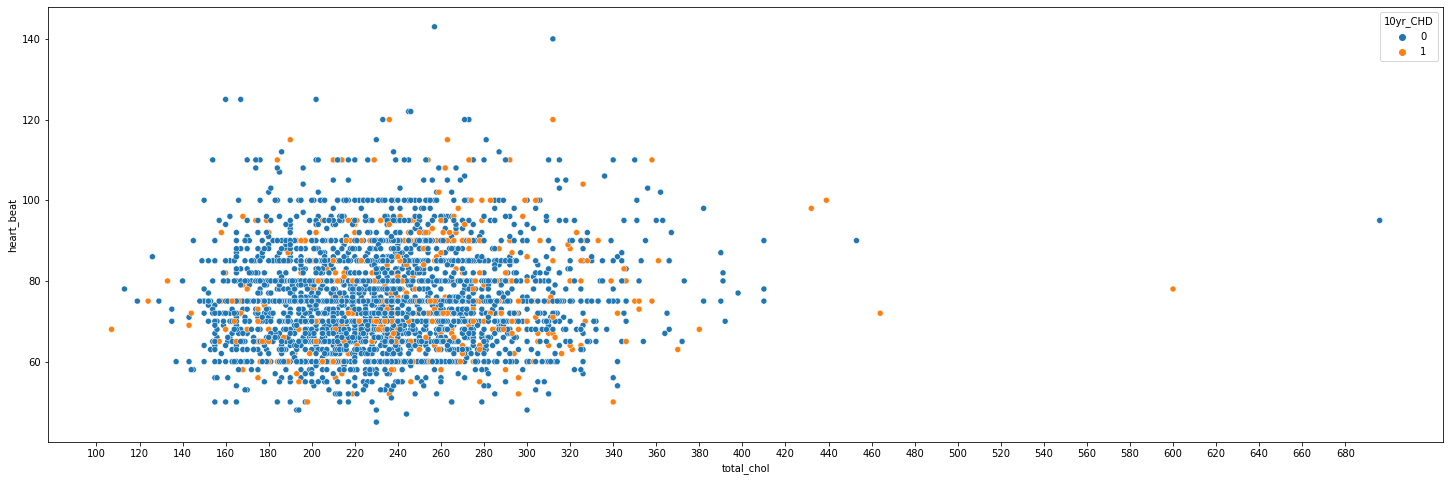

In [29]:
# Visualizing The Effects Of Cholestrol Levels On Numericl Columns

for i in num_col:
  if i!='total_chol' and i!='age' and i!='sys_BP' and i!='glucose':
    plt.figure(figsize=(25,8))
    sns.scatterplot(x='total_chol', y=i, data=df, hue='10yr_CHD')
    plt.xticks(np.arange(100,700,20))
    plt.show()



---


From the above analysis, it is clear that:

*   Only 15% of the people got the risk of CVD.
*   The No of people who are diabetic, who got prevalent stroke and who were under BP medication are less than 4%.
*   About 32% of the people are hypertensive, also there are about 44% of the 
*   The distribution of most of the continuous variables is normal.
*   people whose education level is very low.
*   Glucose feature seems to have a significant no of outliers
*   People with low level education are high at risk compared to other levels.
*   The proportion of risk got by both males/females, smokers/non smokers and for those who got prevlent hypertension is same.
*   Even though only few people were under BP medication, the recorded cases are high for people who were not under BP medication. Its same the for observations seen from prevalent stroke.
*   People without diabetes are more at risk.
*   Most of the cases are found with increase in age.
*   Whether the person is smoking/not smoking the affect of CHD is same.


---



## **Outlier Treatment**

**Outlier Detection Using BoxPlots**

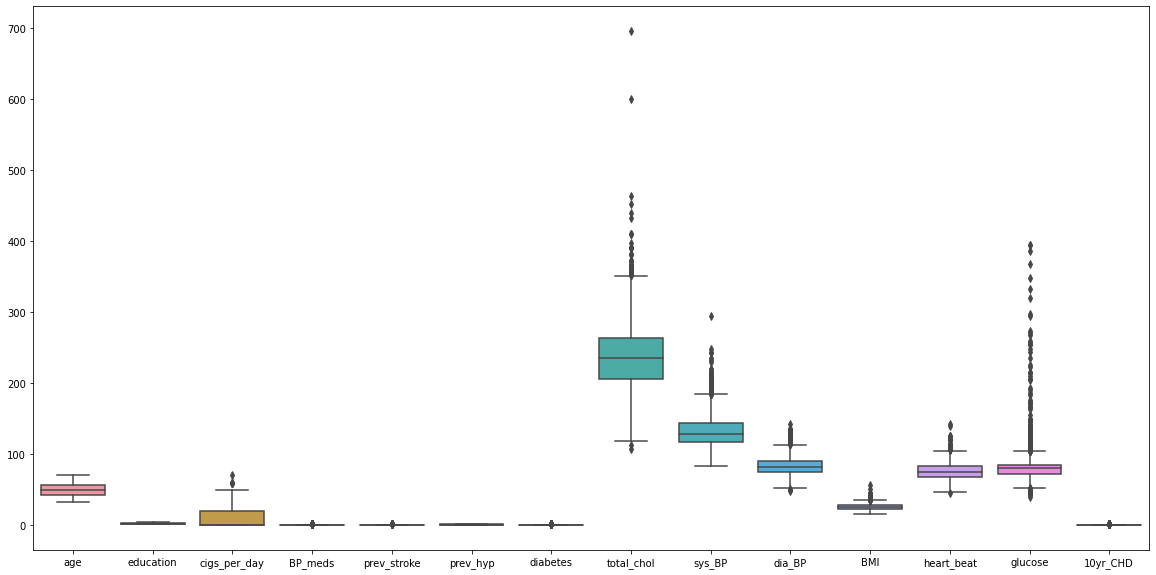

In [30]:
#Visualizing Outliers Using Single Boxplot

plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

**Removing Outliers For Each Column Separately Based On Outlier Count**

In [31]:
q1, q3, median = df.sys_BP.quantile([0.05,0.80,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['sys_BP'] = np.where(df['sys_BP'] > upper_limit, median,np.where(df['sys_BP'] < lower_limit,median,df['sys_BP']))

In [32]:
q1, q3, median = df['cigs_per_day'].quantile([0.05,0.85,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['cigs_per_day'] = np.where(df['cigs_per_day'] > upper_limit, median,np.where(df['cigs_per_day'] < lower_limit,median,df['cigs_per_day']))

In [33]:
q1, q3, median = df.total_chol.quantile([0.05,0.80,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['total_chol'] = np.where(df['total_chol'] > upper_limit, median,np.where(df['total_chol'] < lower_limit,median,df['total_chol']))

In [34]:
q1, q3, median = df.dia_BP.quantile([0.05,0.75,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['dia_BP'] = np.where(df['dia_BP'] > upper_limit, median,np.where(df['dia_BP'] < lower_limit,median,df['dia_BP']))

In [35]:
q1, q3, median = df.BMI.quantile([0.05,0.80,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['BMI'] = np.where(df['BMI'] > upper_limit, median,np.where(df['BMI'] < lower_limit,median,df['BMI']))

In [36]:
q1, q3, median = df.heart_beat.quantile([0.05,0.85,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['heart_beat'] = np.where(df['heart_beat'] > upper_limit, median,np.where(df['heart_beat'] < lower_limit,median,df['heart_beat']))

In [37]:
q1, q3, median = df.glucose.quantile([0.02,0.989,0.5])
IQR=q3-q1
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
df['glucose'] = np.where(df['glucose'] > upper_limit, median,np.where(df['glucose'] < lower_limit,median,df['glucose']))

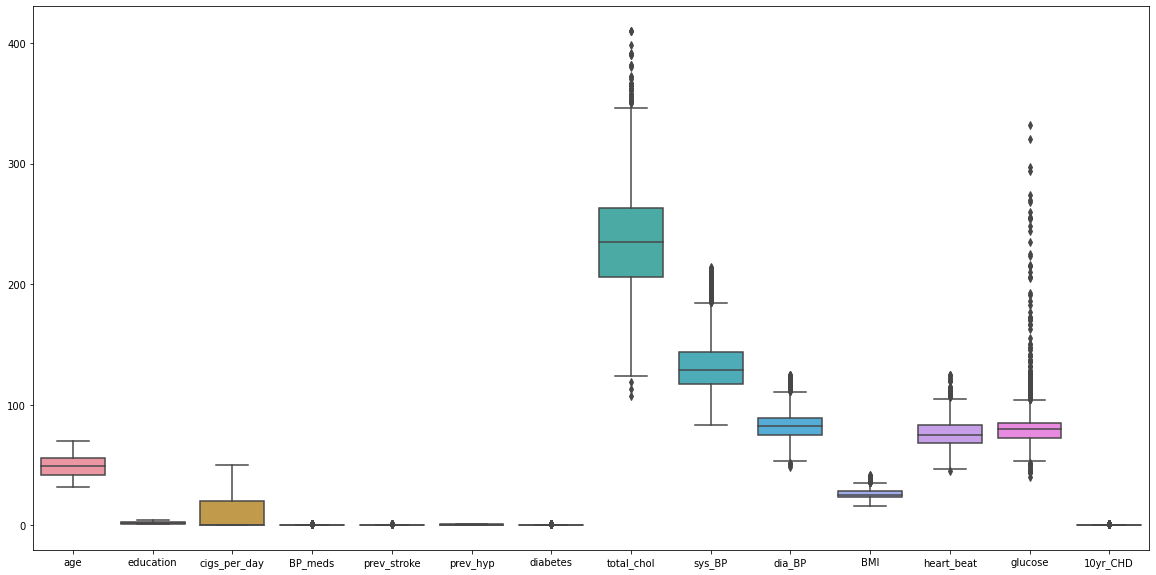

In [38]:
#Visualizing Outliers Using Single Boxplot

plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

## **Feature Selection**

**Encoding Categorical Values**

In [39]:
# One Hot Encoding For Categorical Values In Sex And Smoking Columns

encoder = {'sex':{'M':1, 'F':0},'smoking':{'YES':1, 'NO': 0}}
df = df.replace(encoder)

**Checking Multicolinearity Using Heatmap**

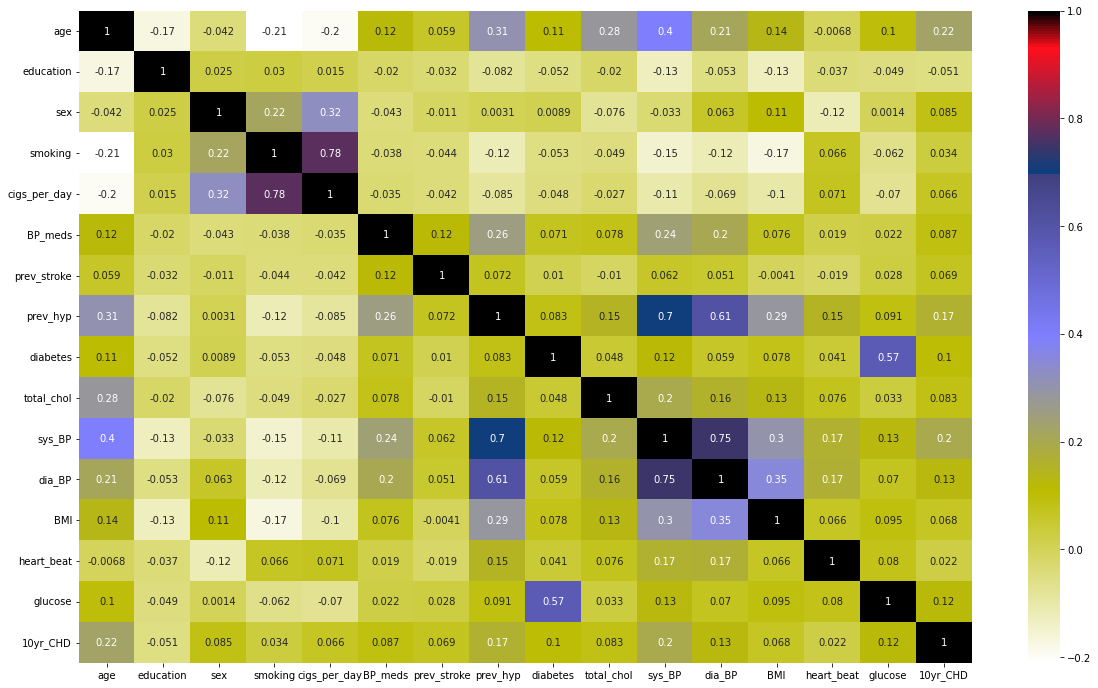

In [40]:
# HeatMap Of All Columns

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='gist_stern_r')
plt.show()

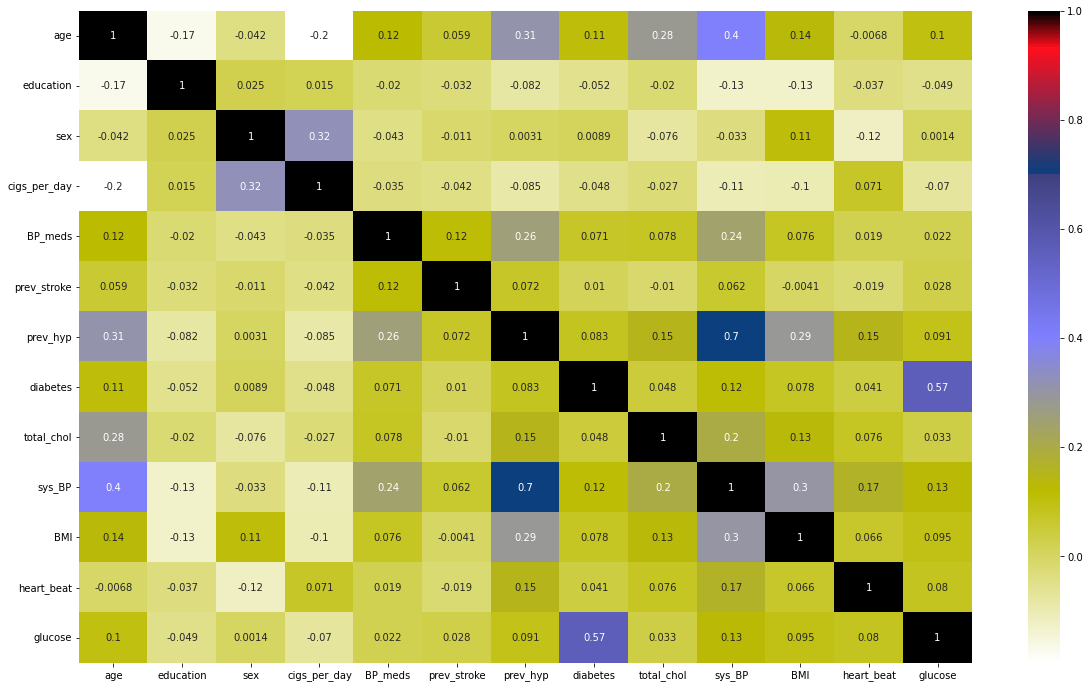

In [41]:
# HeatMap Of Selected Features

new_df=df[['age','education','sex','cigs_per_day','BP_meds','prev_stroke','prev_hyp','diabetes','total_chol','sys_BP','BMI','heart_beat','glucose']].copy()
plt.figure(figsize=(20,12))
sns.heatmap(new_df.corr(),annot=True,cmap='gist_stern_r')
plt.show()

In [42]:
# Selected Features

list(new_df.columns)

['age',
 'education',
 'sex',
 'cigs_per_day',
 'BP_meds',
 'prev_stroke',
 'prev_hyp',
 'diabetes',
 'total_chol',
 'sys_BP',
 'BMI',
 'heart_beat',
 'glucose']

## **Handling Class Imbalance**

In [43]:
# Importing Libraries

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Dividing Independent And Dependent Variables
X = new_df
y = df['10yr_CHD'].copy()

# Assigning Variable For OverSampling
ros = RandomOverSampler(random_state=0)

# Assigning Predictor And Target Variable
x_ros, y_ros = ros.fit_resample(X,y)
print('Original dataset shape', len(y))
print('Resampled dataset shape', len(y_ros))

# Splitting The Train Test Data
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.25, random_state=5)


Original dataset shape 3390
Resampled dataset shape 5758


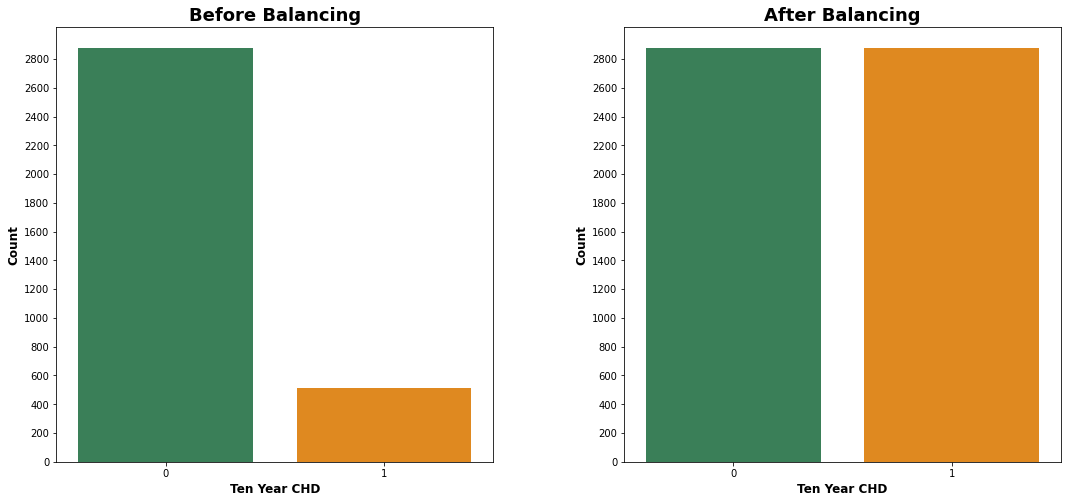

In [44]:
# Plotting The Difference Between Balanced & Imbalanced Data

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.countplot(x=y, palette=['seagreen','darkorange'])
plt.title("Before Balancing",fontdict={'fontsize': 18,'fontweight' : 'bold'})
plt.xlabel("Ten Year CHD",fontdict={'fontsize': 12,'fontweight' : 'bold'})
plt.ylabel("Count",fontdict={'fontsize': 12,'fontweight' : 'bold'})
plt.yticks(np.arange(0,3000,200))

plt.subplot(1,2,2)
sns.countplot(x=y_ros, palette=['seagreen','darkorange'])
plt.title("After Balancing",fontdict={'fontsize': 18,'fontweight' : 'bold'})
plt.xlabel("Ten Year CHD",fontdict={'fontsize': 12,'fontweight' : 'bold'})
plt.ylabel("Count",fontdict={'fontsize': 12,'fontweight' : 'bold'})
plt.yticks(np.arange(0,3000,200))

plt.subplots_adjust(hspace= 0.2, wspace= 0.3)
plt.show()

## **Model Building**



---


**Feature Scaling**


---



In [45]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)



---


**Model Evaluation**


---



In [46]:
# Importing Evaluation Metrics

from sklearn.metrics import f1_score, confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

**1. Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       725
           1       0.66      0.67      0.66       715

    accuracy                           0.66      1440
   macro avg       0.66      0.66      0.66      1440
weighted avg       0.66      0.66      0.66      1440



**2. Decision Tree Classifier**

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2=dt.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       725
           1       0.83      0.90      0.86       715

    accuracy                           0.86      1440
   macro avg       0.86      0.86      0.86      1440
weighted avg       0.86      0.86      0.86      1440



**3. Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       725
           1       0.95      1.00      0.97       715

    accuracy                           0.97      1440
   macro avg       0.98      0.97      0.97      1440
weighted avg       0.98      0.97      0.97      1440



**4. ADA Boost Classifier**

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred4=ab.predict(X_test)
acc4 = accuracy_score(y_test, y_pred4)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       725
           1       0.66      0.70      0.68       715

    accuracy                           0.67      1440
   macro avg       0.67      0.67      0.67      1440
weighted avg       0.67      0.67      0.67      1440



**5. XG Boost Classifier**

In [51]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred5=xg.predict(X_test)
acc5 = accuracy_score(y_test, y_pred5)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       725
           1       0.69      0.76      0.72       715

    accuracy                           0.71      1440
   macro avg       0.71      0.71      0.71      1440
weighted avg       0.71      0.71      0.71      1440



**6. KNN Classifier**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred6=knn.predict(X_test)
acc6 = accuracy_score(y_test, y_pred6)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       725
           1       0.73      0.90      0.81       715

    accuracy                           0.79      1440
   macro avg       0.80      0.79      0.78      1440
weighted avg       0.80      0.79      0.78      1440



**7. Support Vector Classifier**

In [53]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred7=svc.predict(X_test)
acc7 = accuracy_score(y_test, y_pred7)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       725
           1       0.71      0.74      0.72       715

    accuracy                           0.72      1440
   macro avg       0.72      0.72      0.72      1440
weighted avg       0.72      0.72      0.72      1440



**8. Gaussian Naive Bayes Classifier**

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred8=nb.predict(X_test)
acc8 = accuracy_score(y_test, y_pred8)
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.56      0.93      0.70       725
           1       0.79      0.27      0.40       715

    accuracy                           0.60      1440
   macro avg       0.68      0.60      0.55      1440
weighted avg       0.68      0.60      0.55      1440





---


**Models Accuracies**


---



In [55]:
# Accuracy Of Models For Training And Testing Data

mods=[lr,dt,rf,ab,xg,knn,svc,nb]
names=['Logistic Regressor','Decision Tree','Random Forest','Adaptive Boosting','Extreme Boosting','K-Nearest Neighbour','Support Vector','Naive Bayes']
trn=[]
tst=[]

for i in mods:
  train_acc=i.score(X_train,y_train)
  test_acc=i.score(X_test,y_test)
  trn.append(round(train_acc,3)*100)
  tst.append(round(test_acc,3)*100)

In [56]:
from tabulate import tabulate

data={}
data['Classifier']=names
data['Train Accuracy %']=trn
data['Test Accuracy %']=tst
print(tabulate(data,headers='keys',tablefmt='fancy_grid',showindex=range(1,9),numalign='center'))

╒════╤═════════════════════╤════════════════════╤═══════════════════╕
│    │ Classifier          │  Train Accuracy %  │  Test Accuracy %  │
╞════╪═════════════════════╪════════════════════╪═══════════════════╡
│ 1  │ Logistic Regressor  │        67.3        │       66.2        │
├────┼─────────────────────┼────────────────────┼───────────────────┤
│ 2  │ Decision Tree       │        100         │        86         │
├────┼─────────────────────┼────────────────────┼───────────────────┤
│ 3  │ Random Forest       │        100         │       97.4        │
├────┼─────────────────────┼────────────────────┼───────────────────┤
│ 4  │ Adaptive Boosting   │        69.7        │       67.2        │
├────┼─────────────────────┼────────────────────┼───────────────────┤
│ 5  │ Extreme Boosting    │        75.3        │        71         │
├────┼─────────────────────┼────────────────────┼───────────────────┤
│ 6  │ K-Nearest Neighbour │        86.5        │       78.5        │
├────┼──────────────